In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import json
import os

In [2]:
def plot_similarity(style, artwork_name, similarity_first, similarity_consecutive, text):
    results_folder = f'results/{style}/{artwork_name}'
    os.makedirs(results_folder, exist_ok=True)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(similarity_first) + 1), similarity_first, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel(f'{text} Similarity')
    plt.title(f'{text} Similarity Between the First Generated Caption And The Other Iterations')
    plt.grid(True)
    plt.savefig(os.path.join(results_folder, f'{artwork_name}_{text}_first.png'))
    plt.close()

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(similarity_consecutive) + 1), similarity_consecutive, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel(f'{text} Similarity')
    plt.title(f'{text} Similarity Between Consecutive Captions Over Iterations')
    plt.grid(True)
    plt.savefig(os.path.join(results_folder, f'{artwork_name}_{text}_consecutive.png')) 
    plt.close()

In [3]:
def extract_data_from_json(json_file_path):
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)
        extracted_data = {
            'semantic_similarity_initial': data.get('semantic_similarity_initial', []),
            'semantic_similarity_consecutive': data.get('semantic_similarity_consecutive', []),
            'visual_similarity_initial': data.get('visual_similarity_initial', []),
            'visual_similarity_consecutive': data.get('visual_similarity_consecutive', [])
        }
        return extracted_data

In [4]:
results_dir = 'results'

for style in os.listdir(results_dir):
    style_path = os.path.join(results_dir, style)
    if os.path.isdir(style_path):
        for artwork in os.listdir(style_path):
            artwork_path = os.path.join(style_path, artwork)
            if os.path.isdir(artwork_path):
                for file in os.listdir(artwork_path):
                    if file.lower().endswith('.json'):
                        json_file_path = os.path.join(artwork_path, file)
                        extracted_data = extract_data_from_json(json_file_path)
                        plot_similarity(style, artwork, 
                                        extracted_data['semantic_similarity_initial'], 
                                        extracted_data['semantic_similarity_consecutive'], 
                                        'Semantic')
                        plot_similarity(style, artwork, 
                                        extracted_data['visual_similarity_initial'], 
                                        extracted_data['visual_similarity_consecutive'], 
                                        'Visual')

In [5]:
def calculate_statistics(data_list):
    data_array = np.array(data_list)
    mean = np.mean(data_array, axis=0)
    std_dev = np.std(data_array, axis=0)
    return mean, std_dev

def calculate_statistics_2(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0, ddof=1)
    sem = std_dev / np.sqrt(len(data))
    confidence_level = 0.95
    degrees_freedom = len(data) - 1
    confidence_interval = sem * stats.t.ppf((1 + confidence_level) / 2., degrees_freedom)
    return mean, confidence_interval

def plot_statistics(style, measure, mean, std_dev):
    plt.figure(figsize=(10, 5))
    plt.errorbar(range(1, len(mean) + 1), mean, yerr=std_dev, fmt='-o')
    plt.xlabel('Iteration')
    plt.ylabel(f'{measure} Similarity')

    measure_name = 'Content'
    measure_title = 'The 1st Generated Caption And The Generated Captions'
    if measure == 'visual_similarity_initial' or measure == 'visual_similarity_consecutive':
        measure_name = 'Visual'
    if measure == 'semantic_similarity_consecutive' or measure == 'visual_similarity_consecutive':
        measure_title = 'Consecutive Generated Captions'

    title = f'{measure_name} Novelty Between {measure_title} Over Iterations'
    plt.title(f'{measure_name} Novelty for {style} Style')
    plt.grid(True)

    dir = f'results/{style}'
    os.makedirs(dir, exist_ok=True)
    plt.savefig(os.path.join(dir, f'{measure.lower()}_similarity.png'))

    plt.show()
    plt.close()

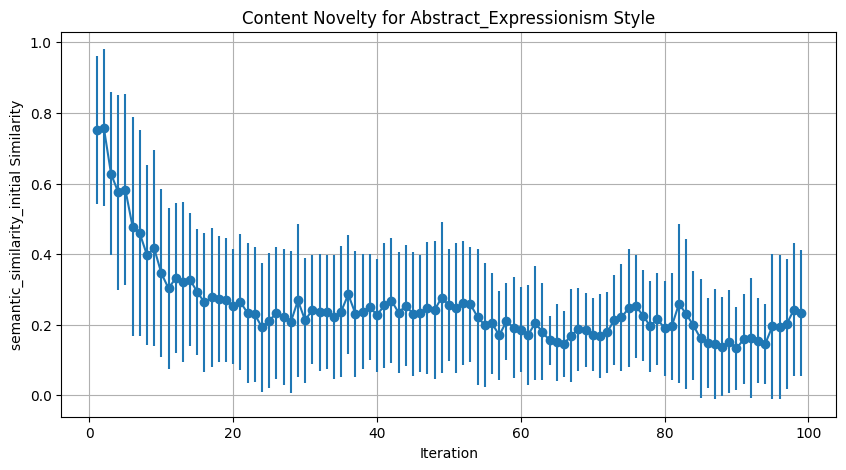

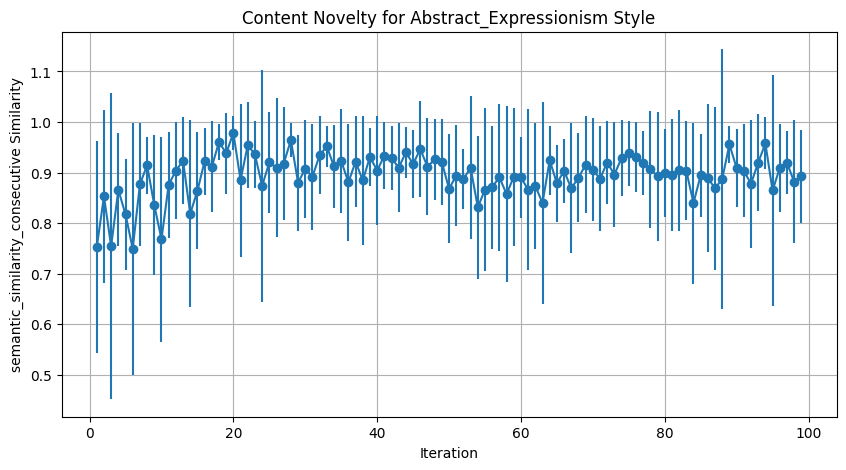

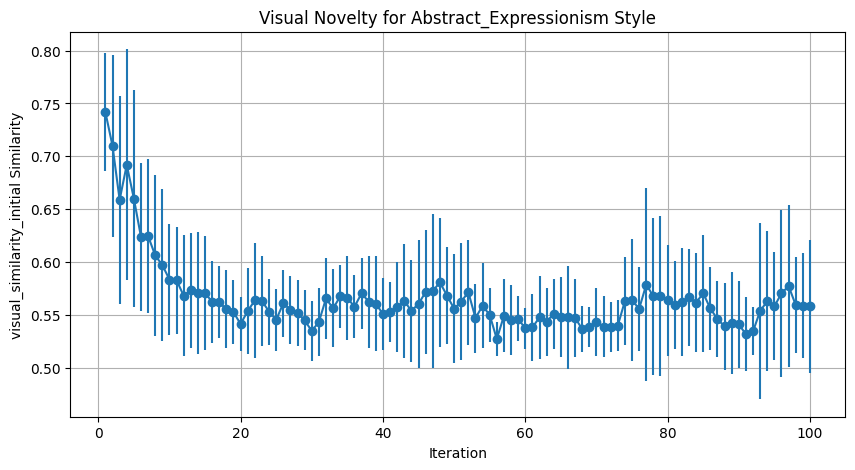

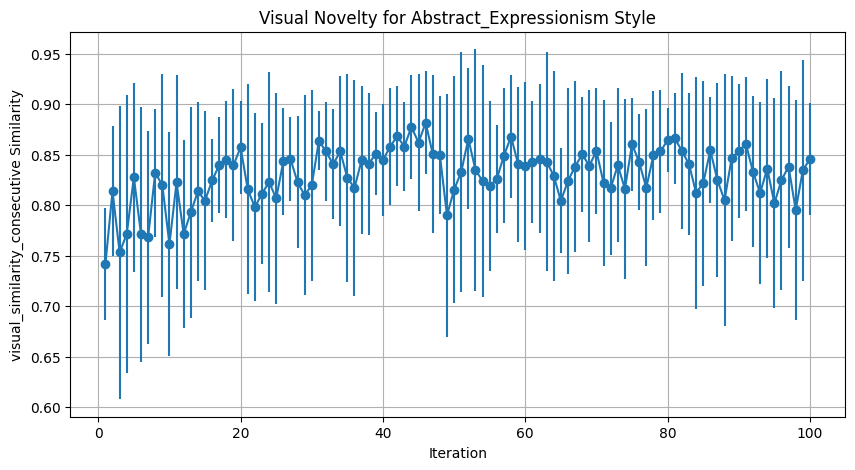

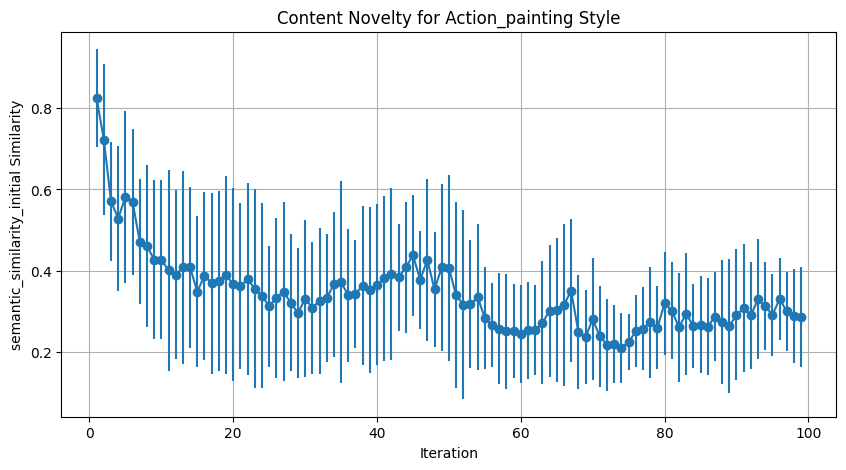

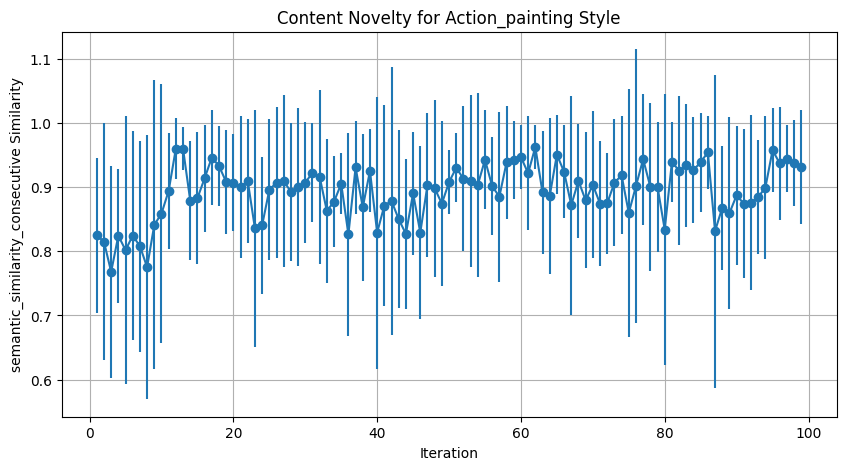

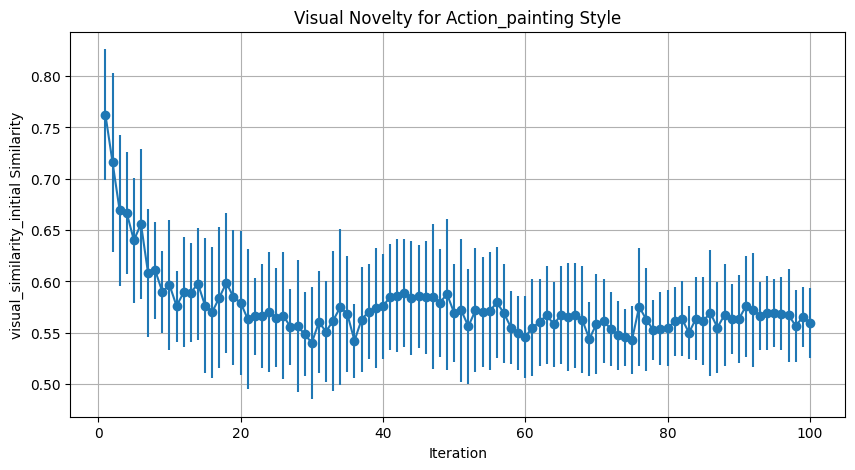

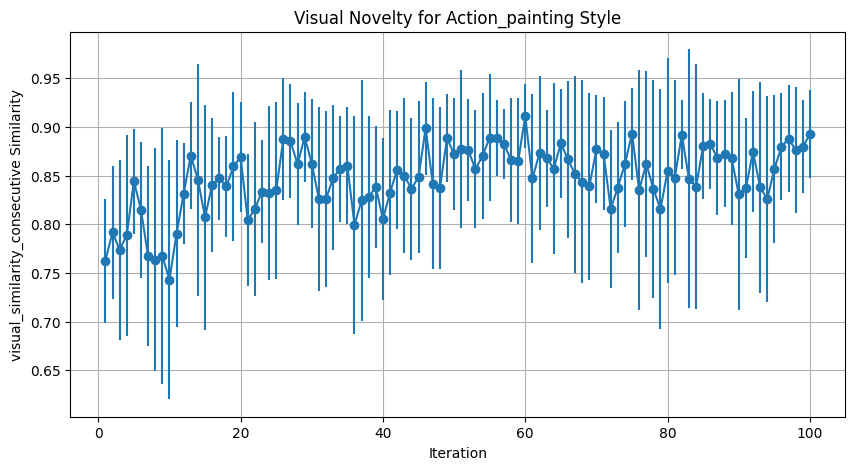

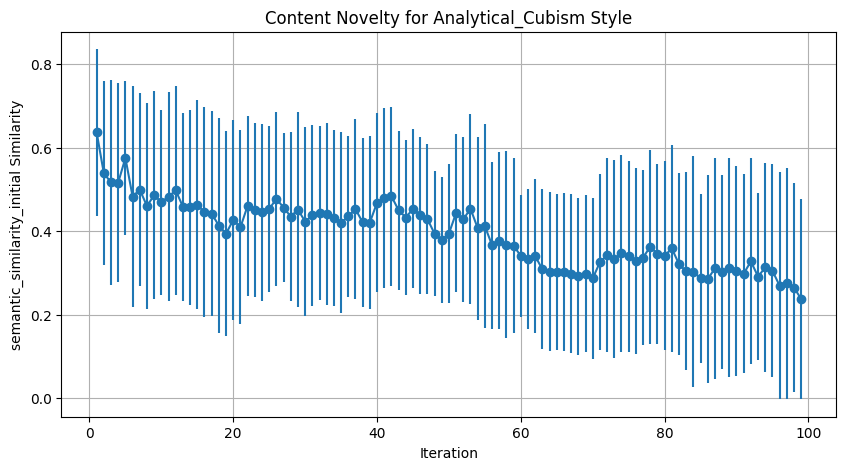

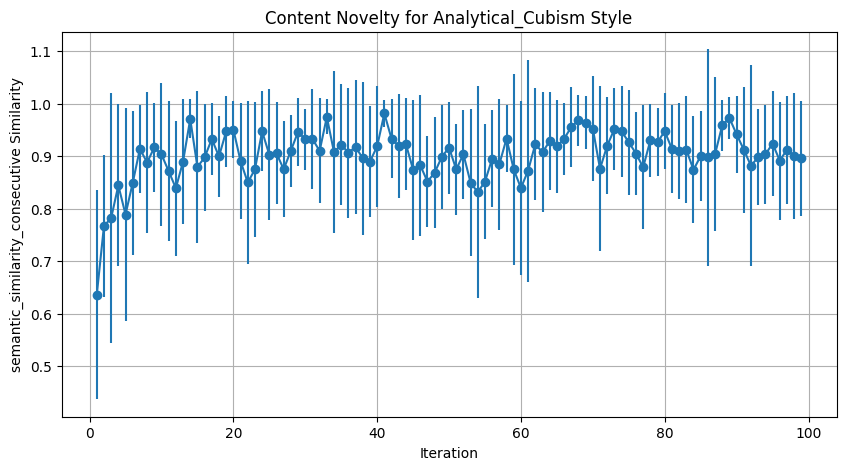

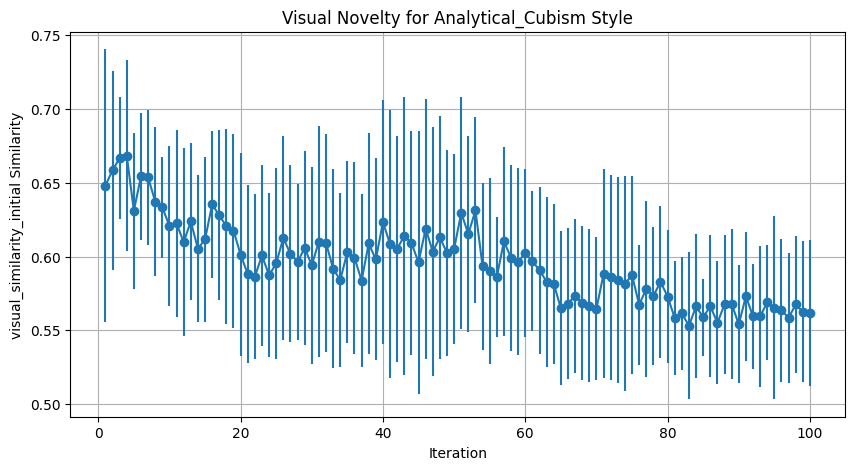

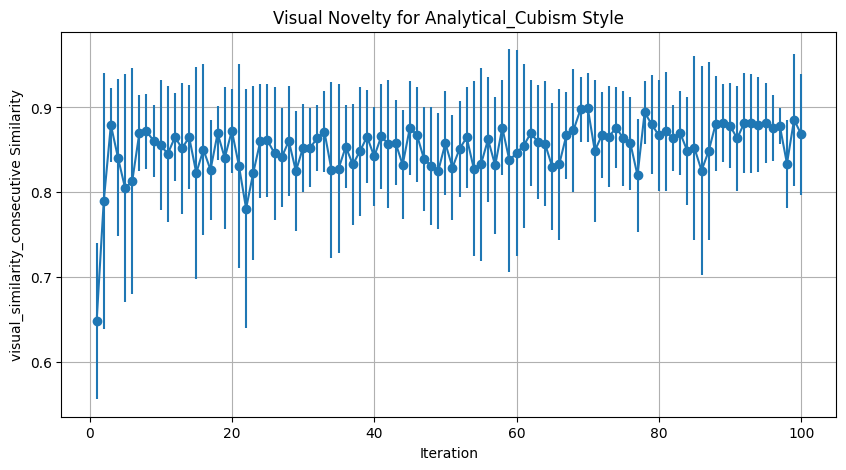

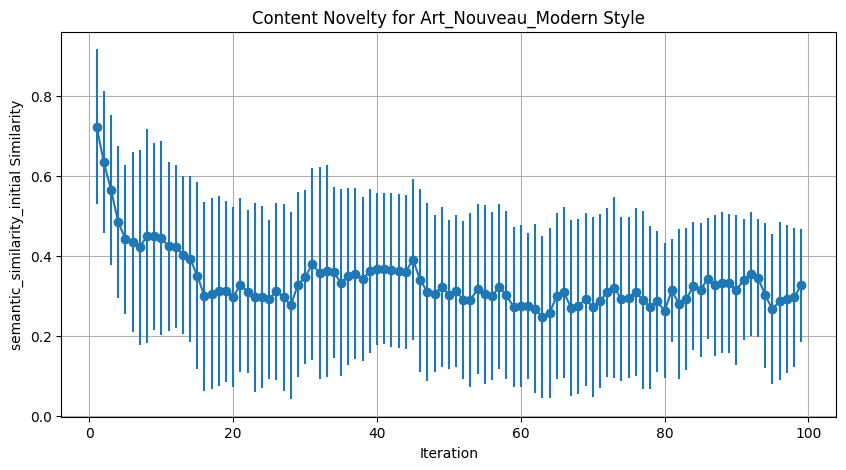

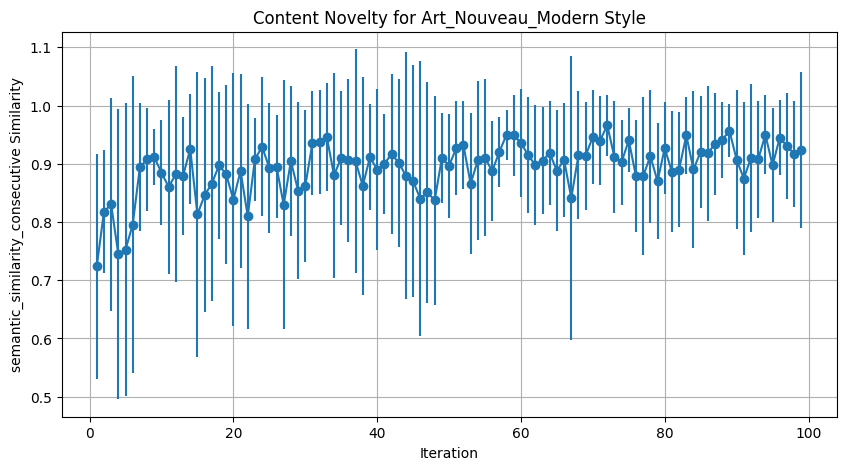

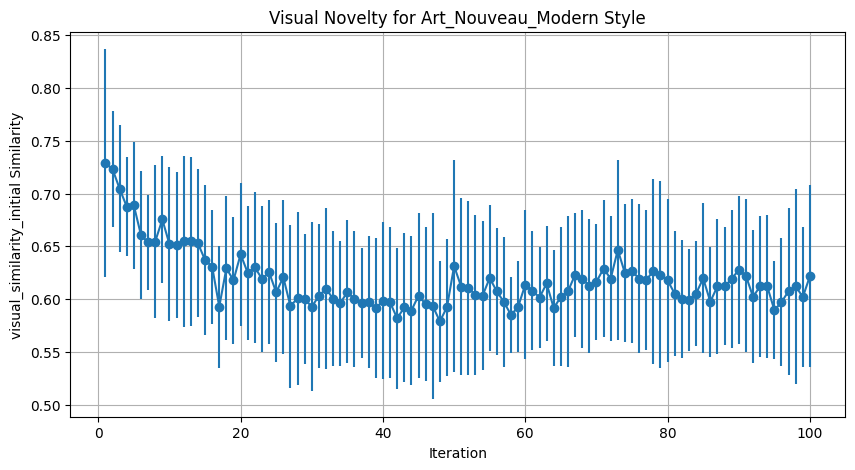

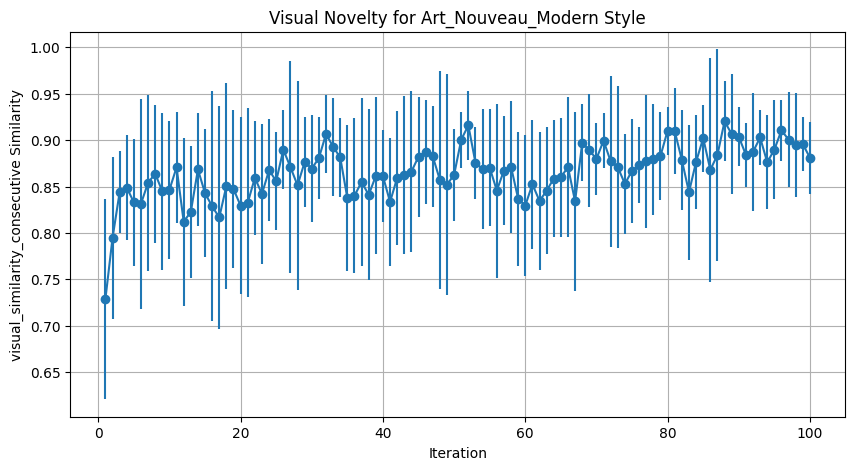

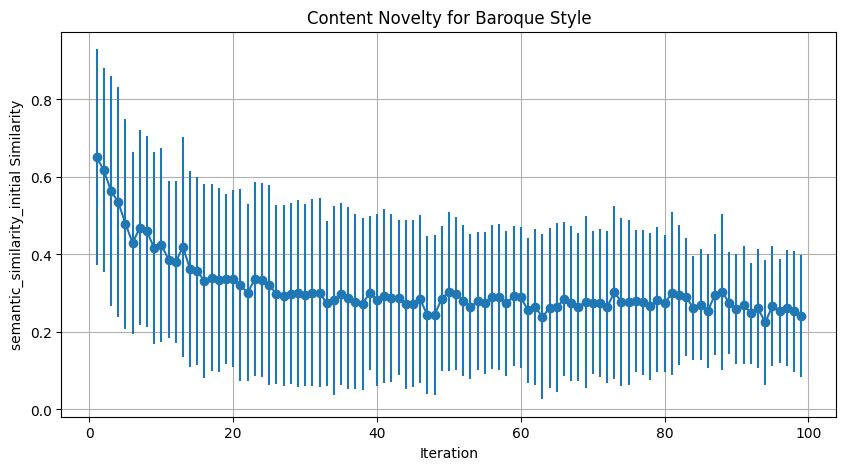

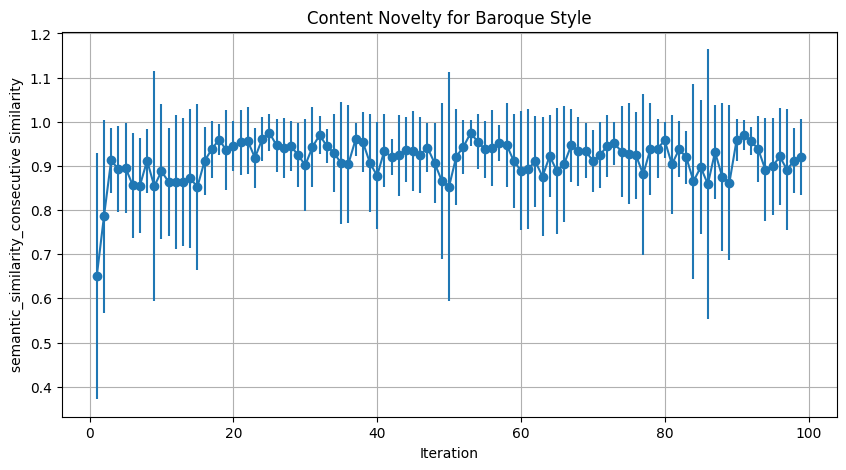

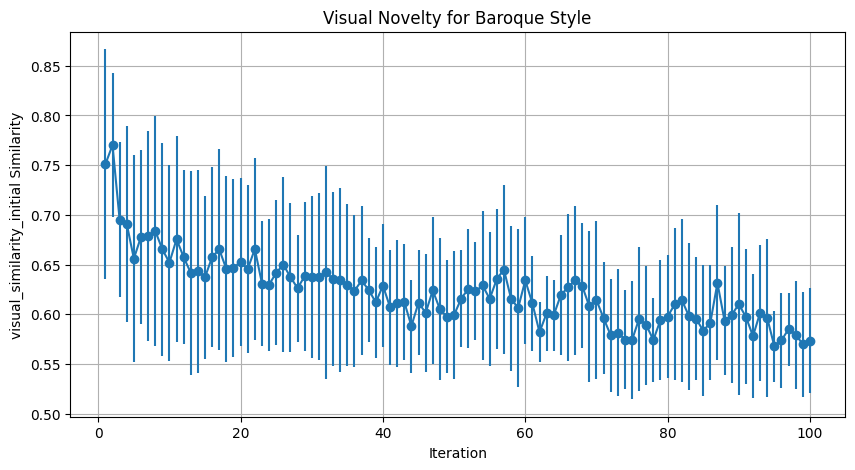

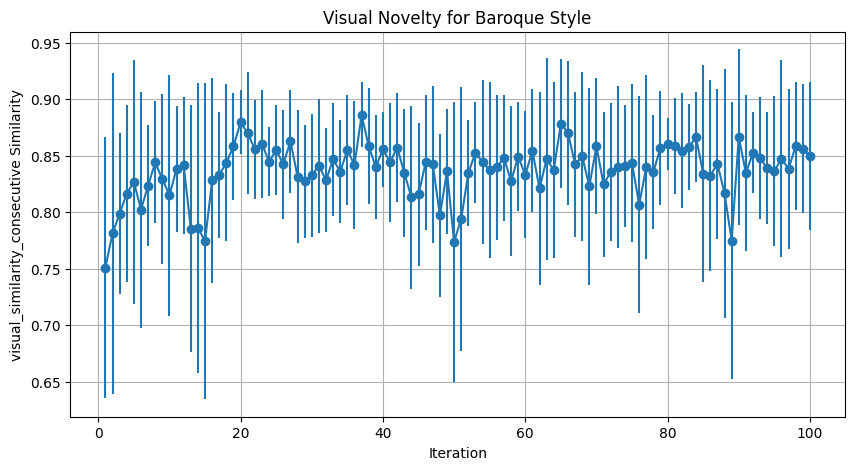

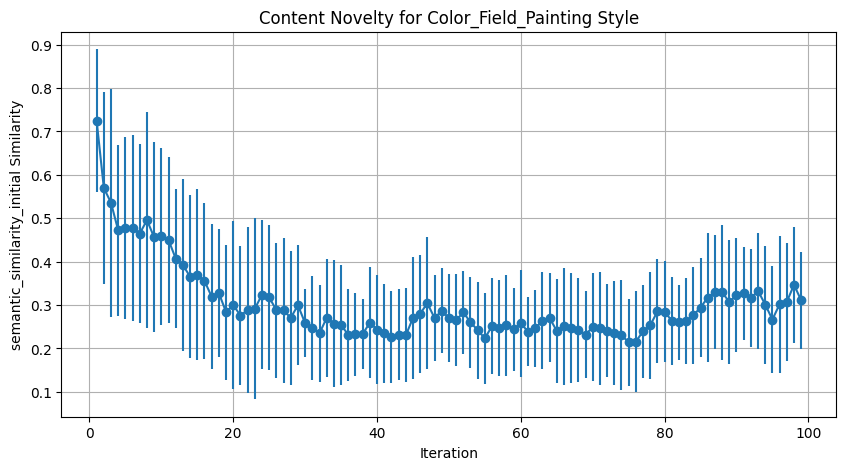

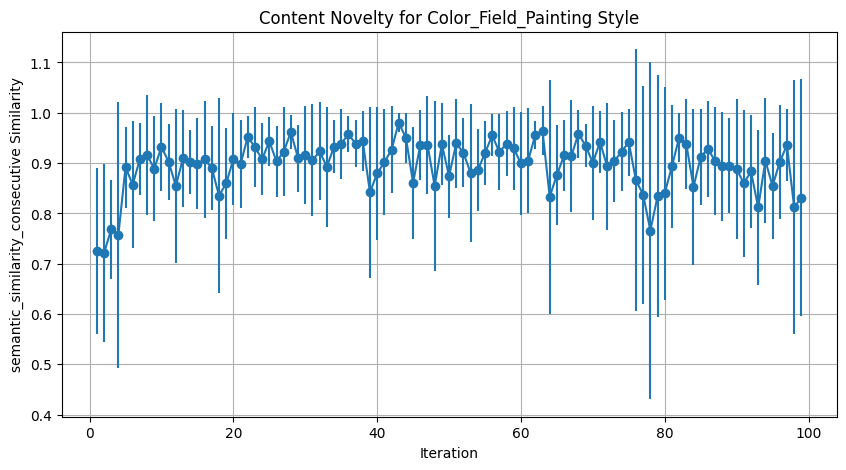

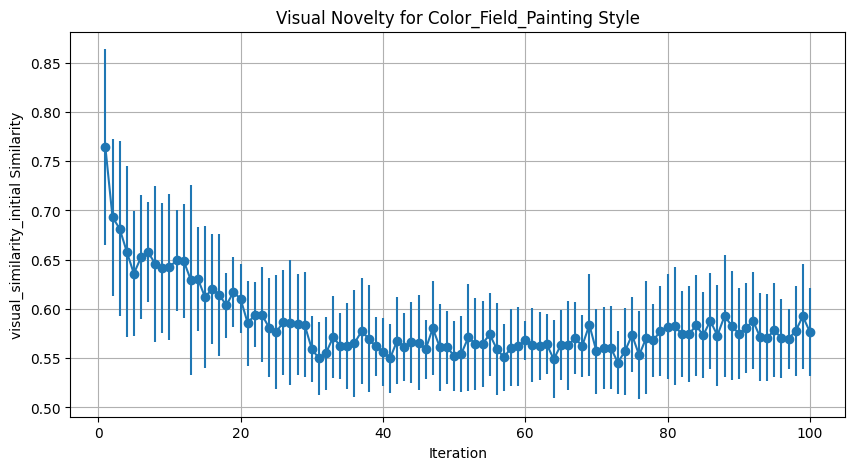

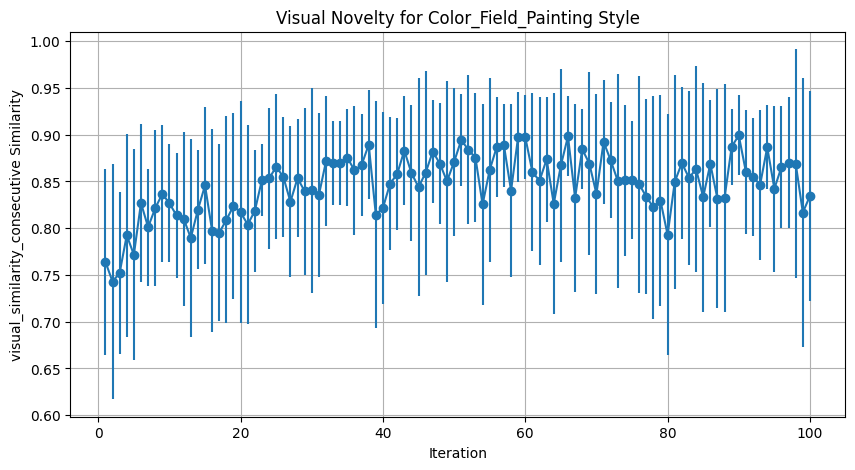

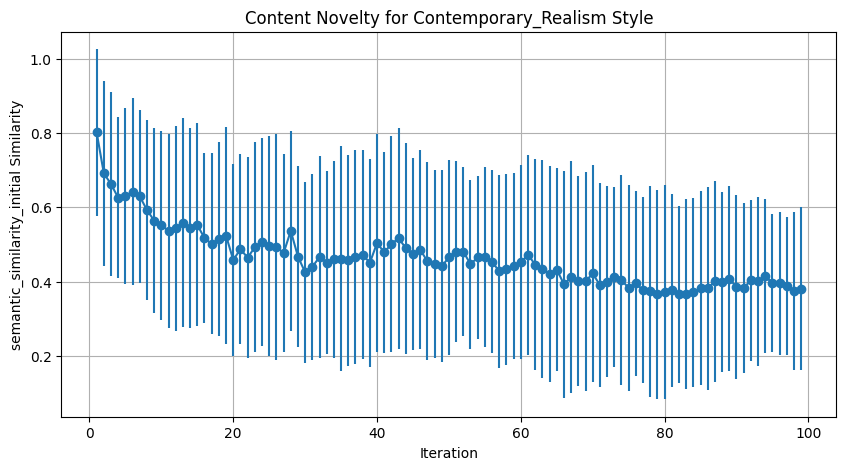

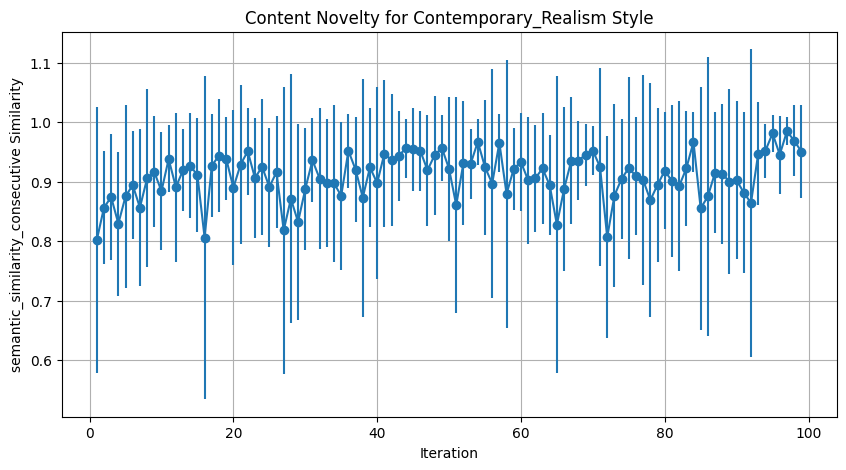

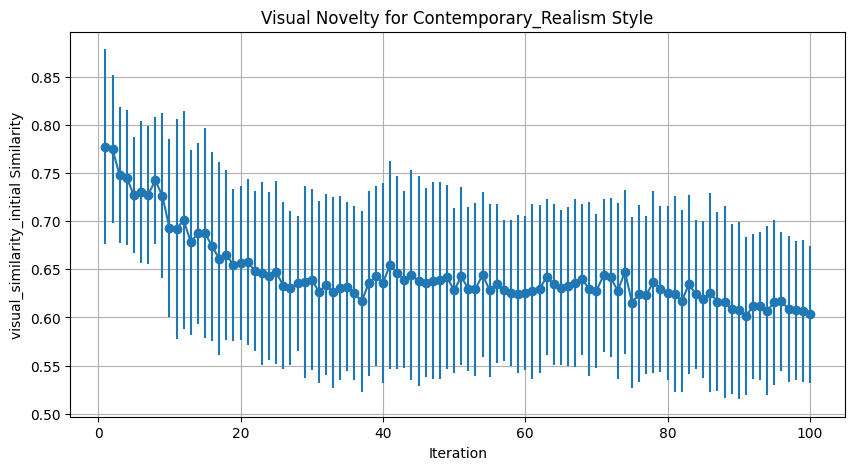

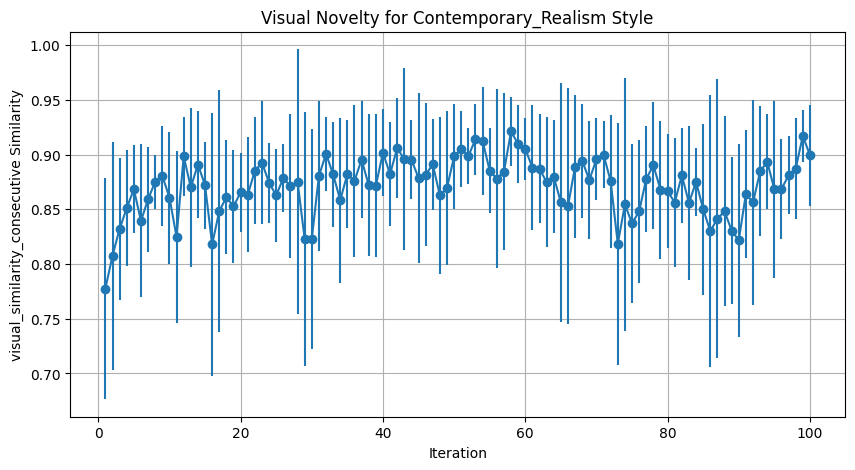

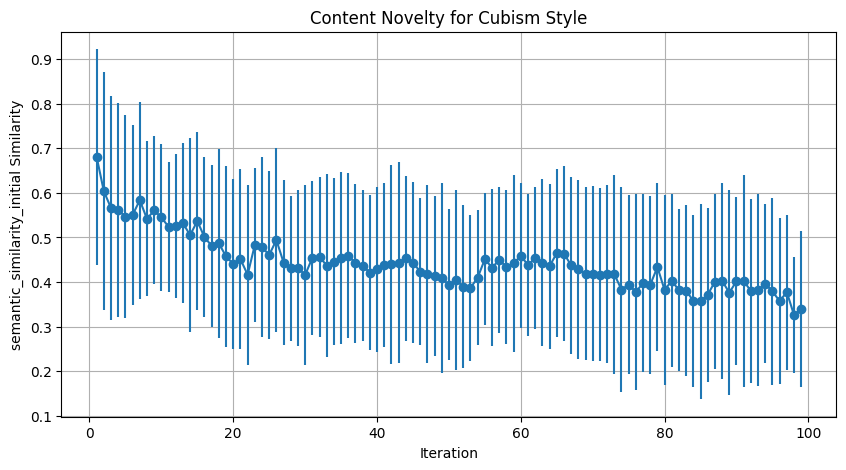

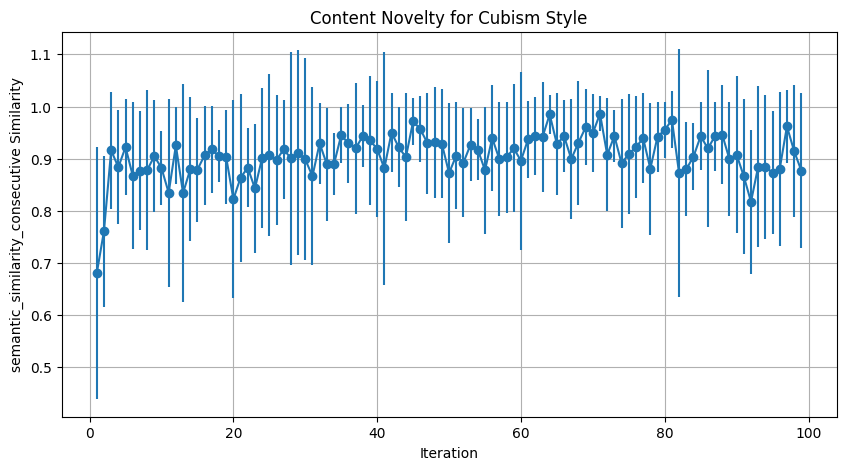

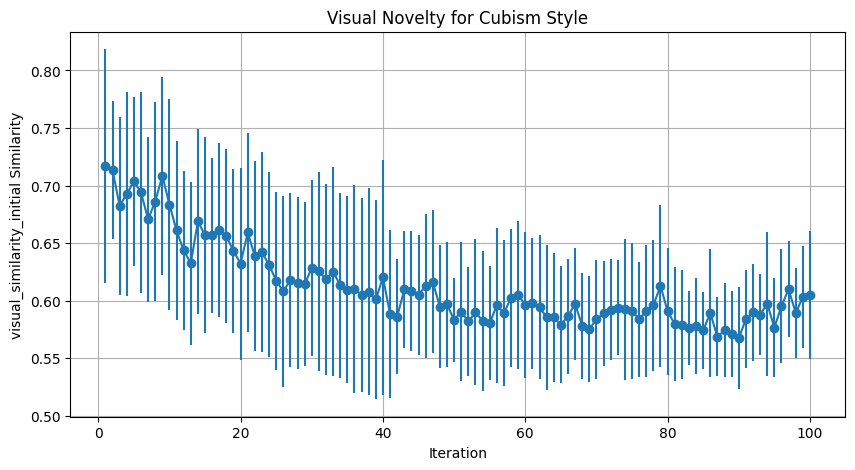

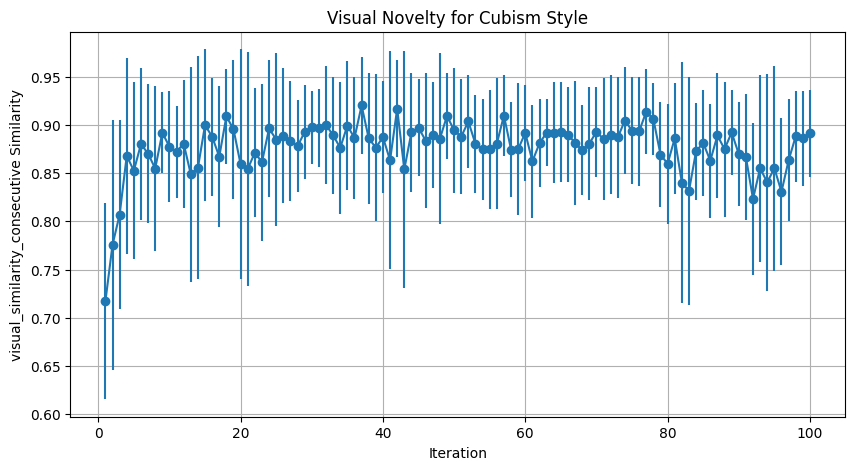

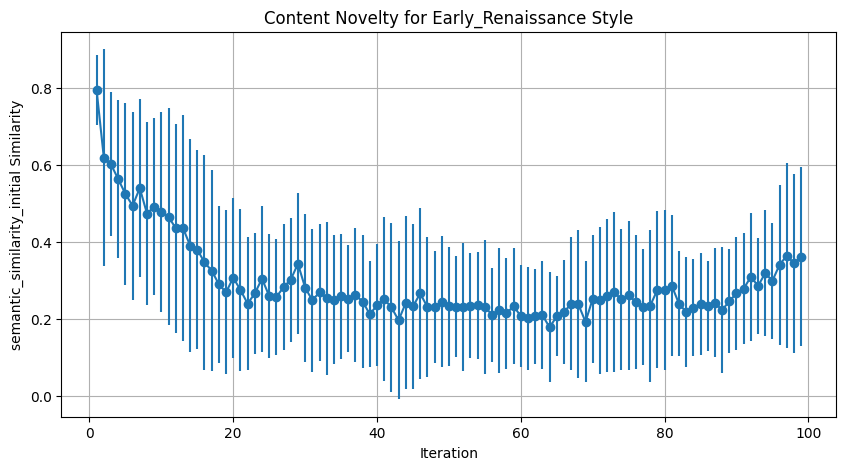

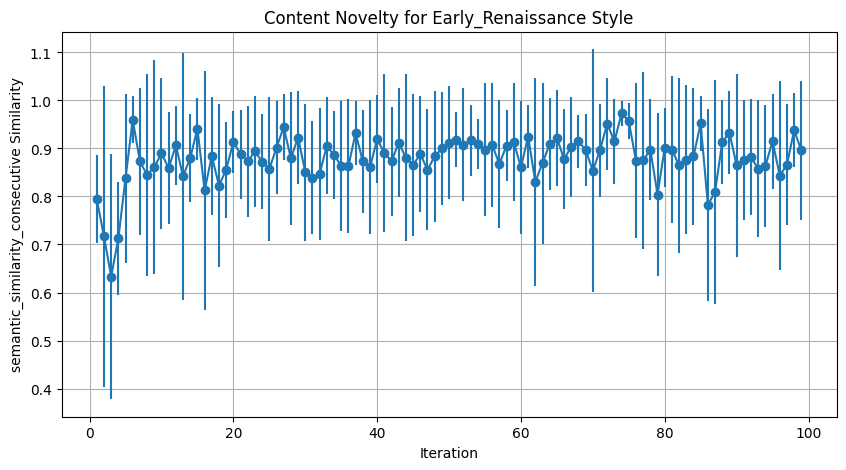

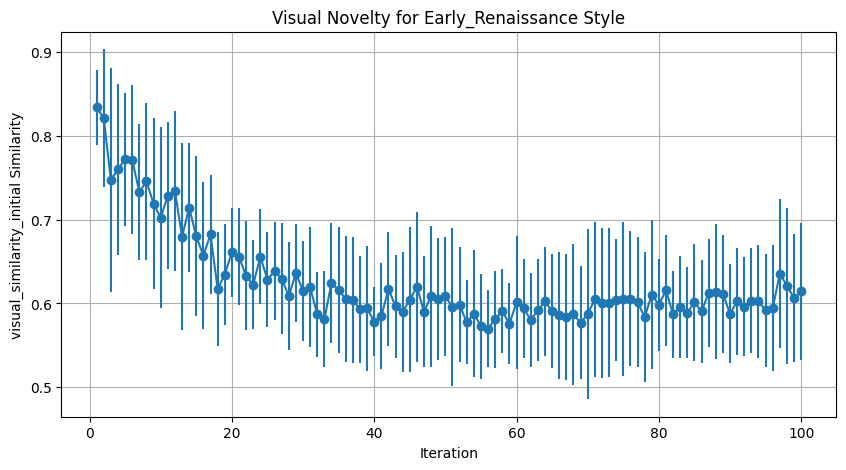

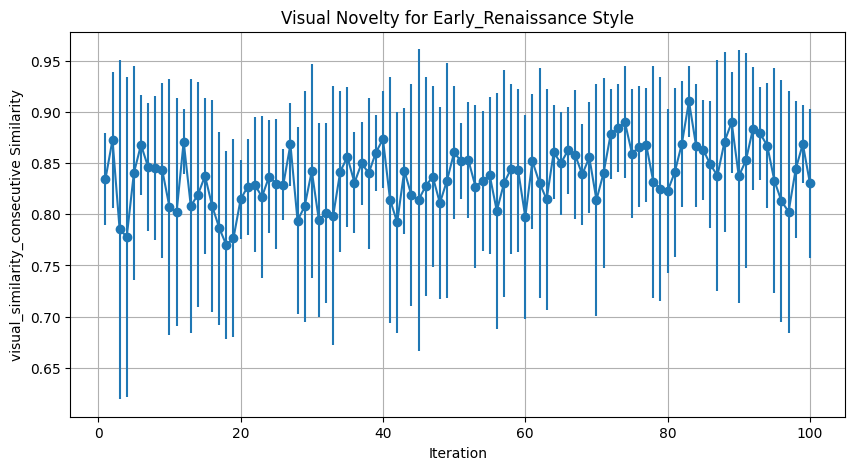

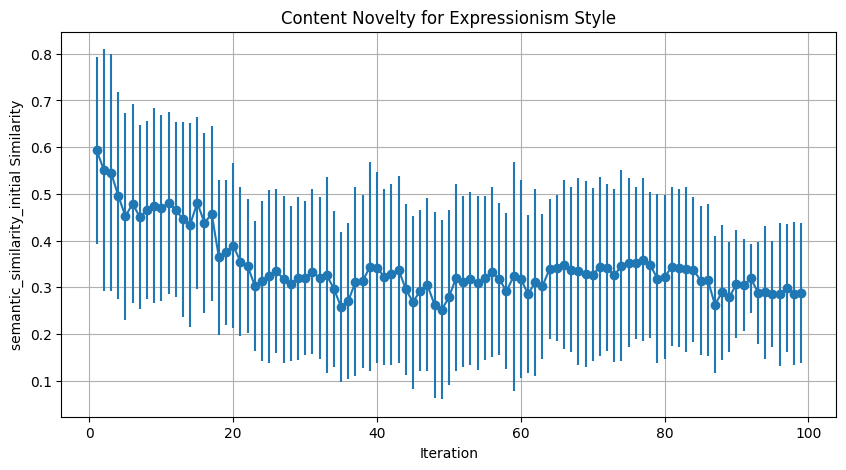

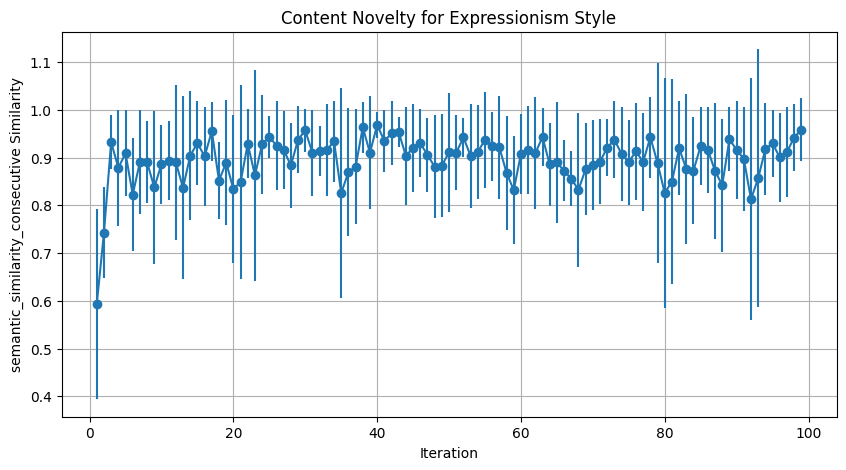

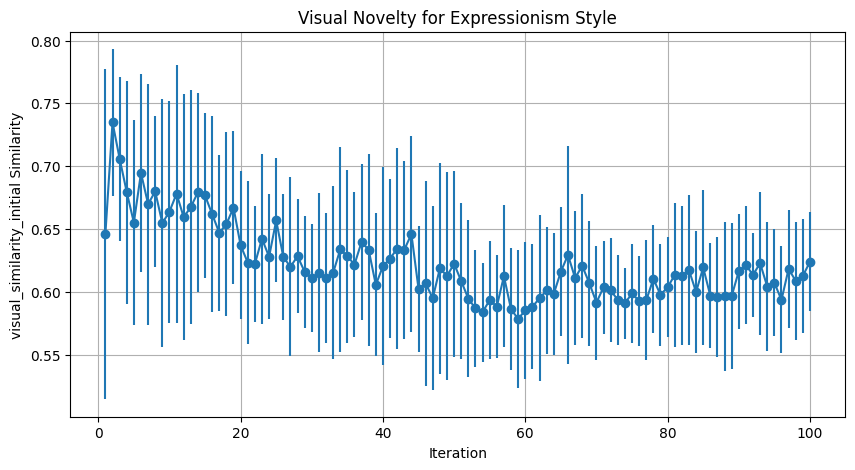

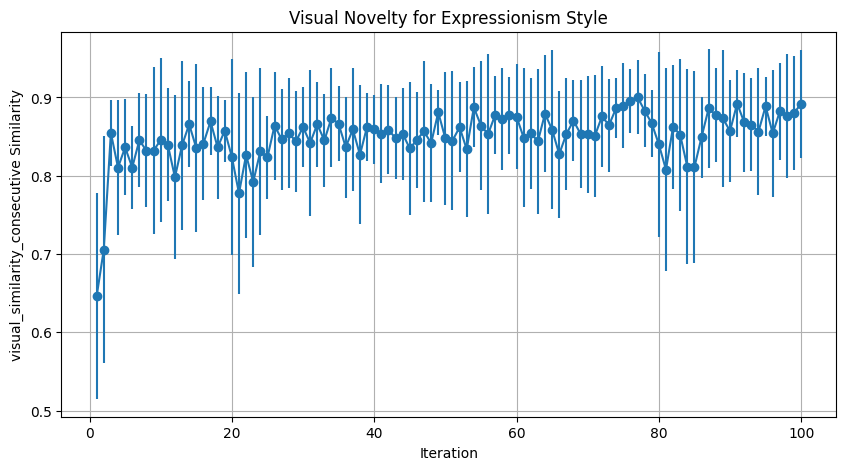

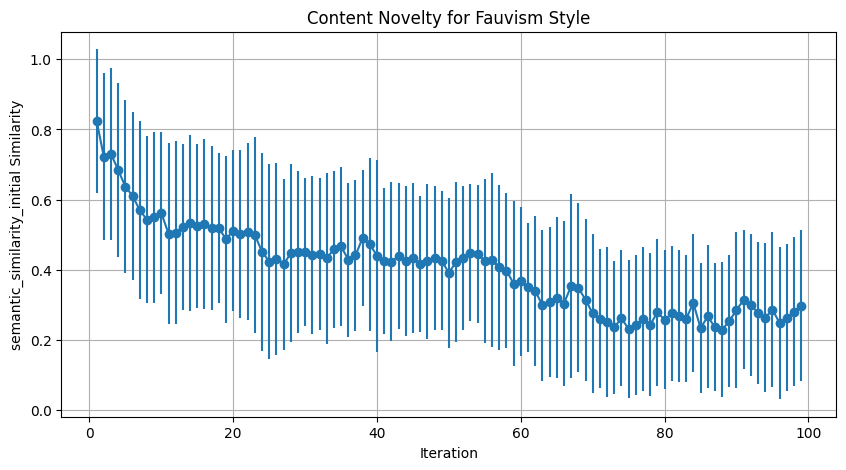

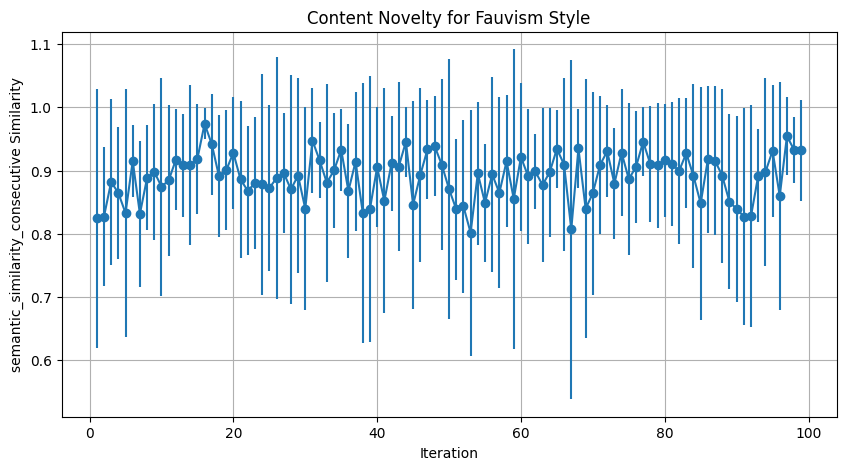

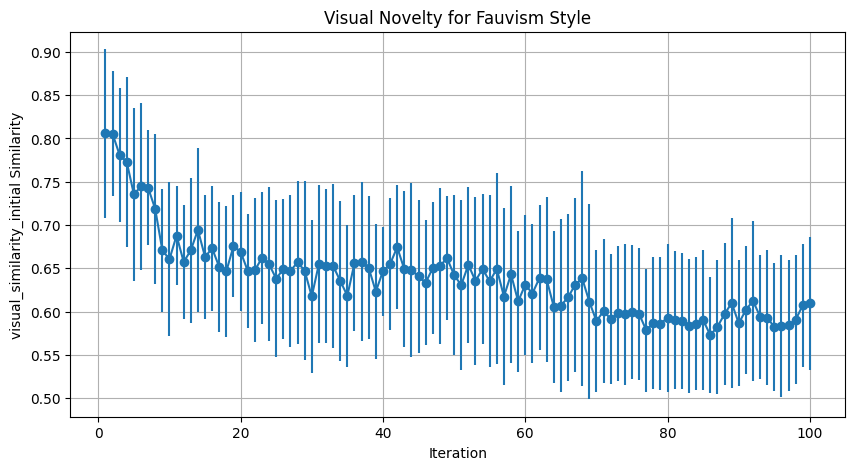

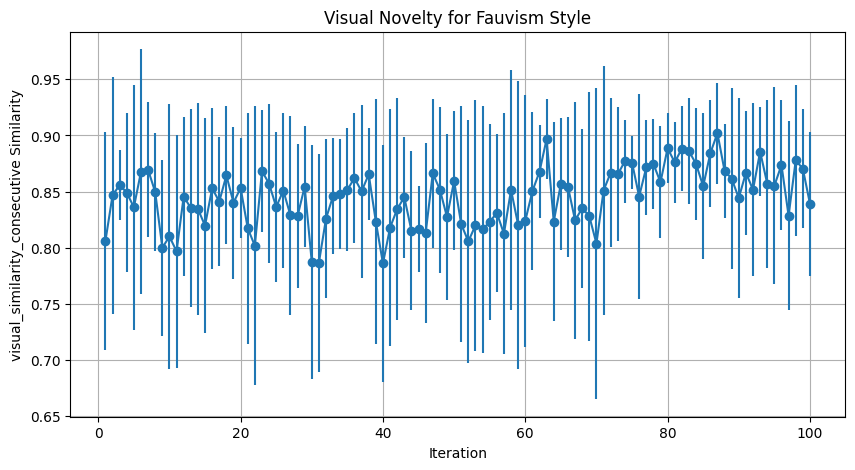

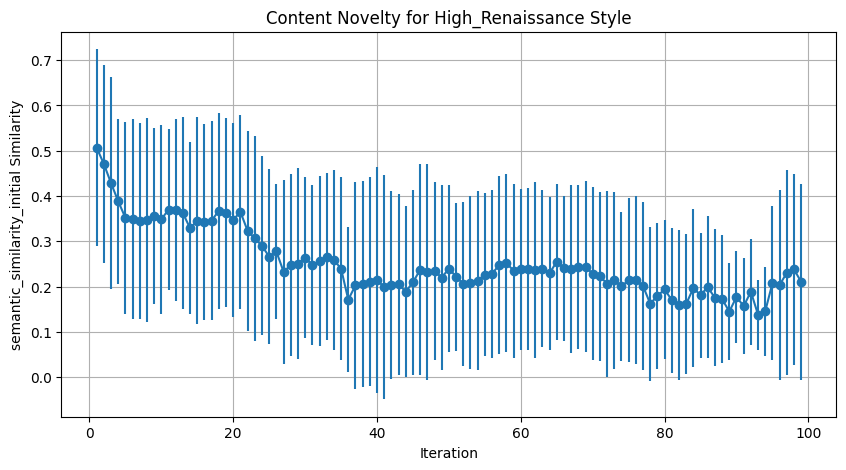

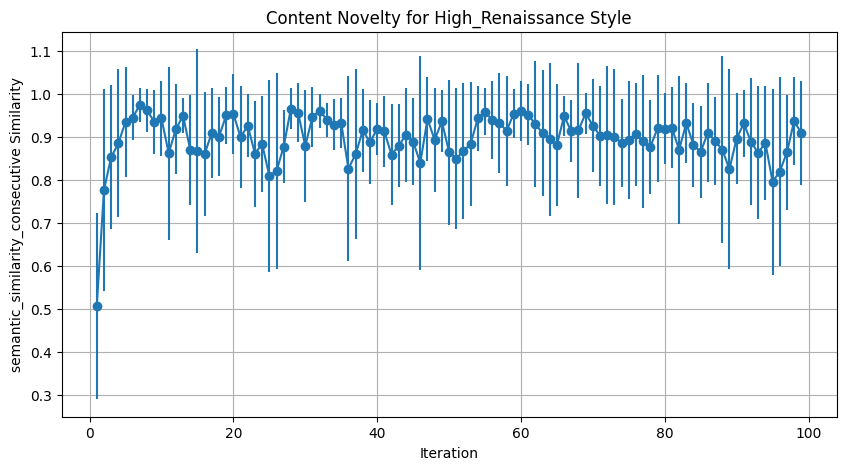

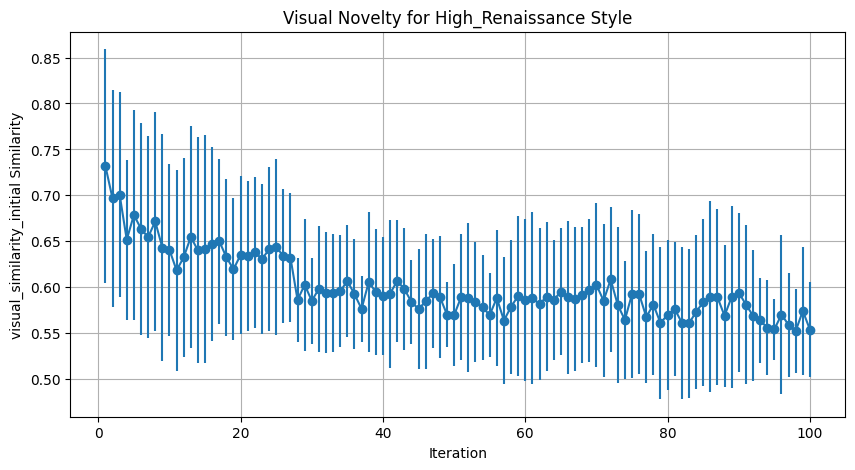

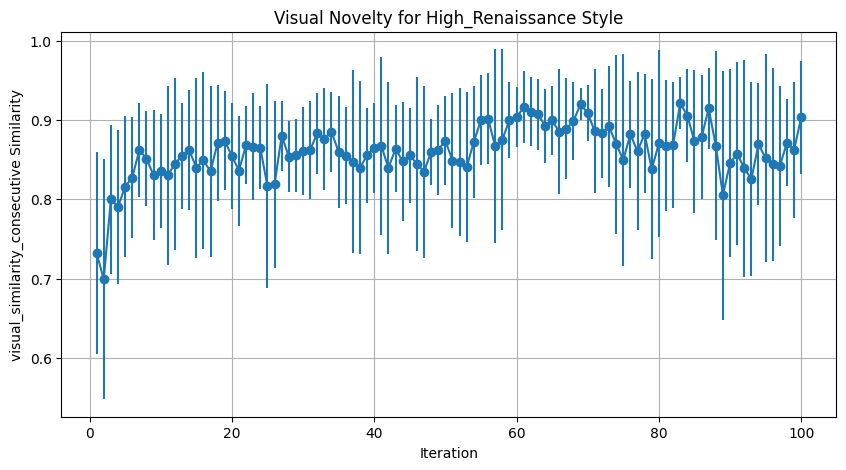

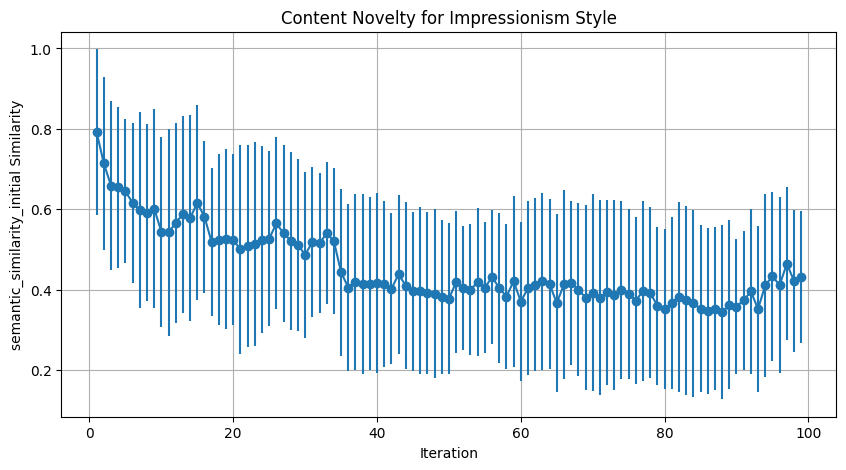

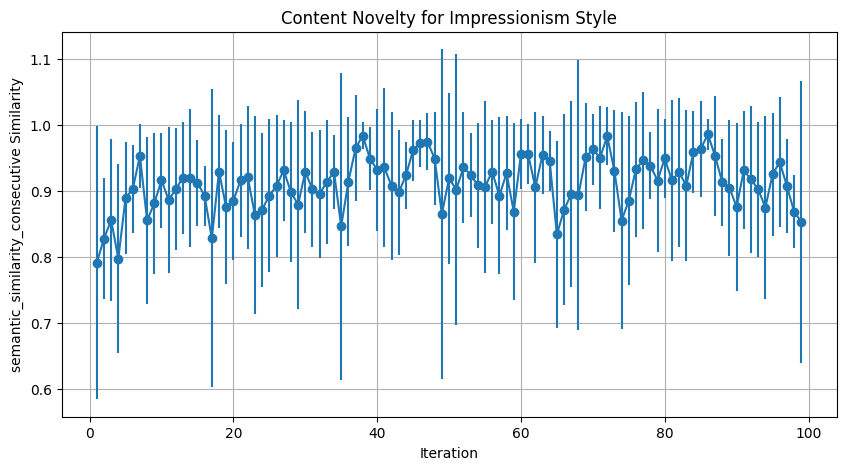

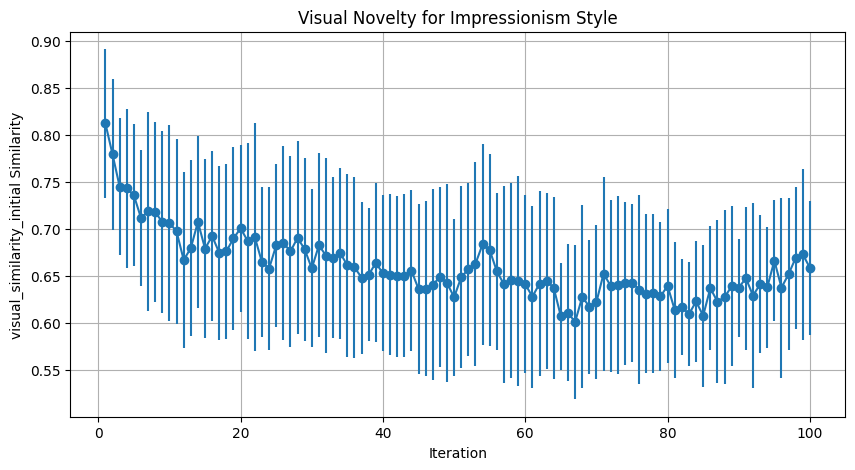

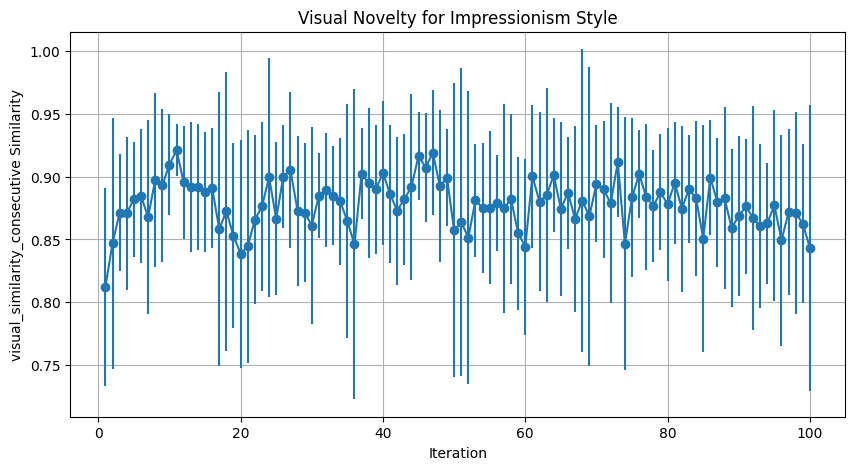

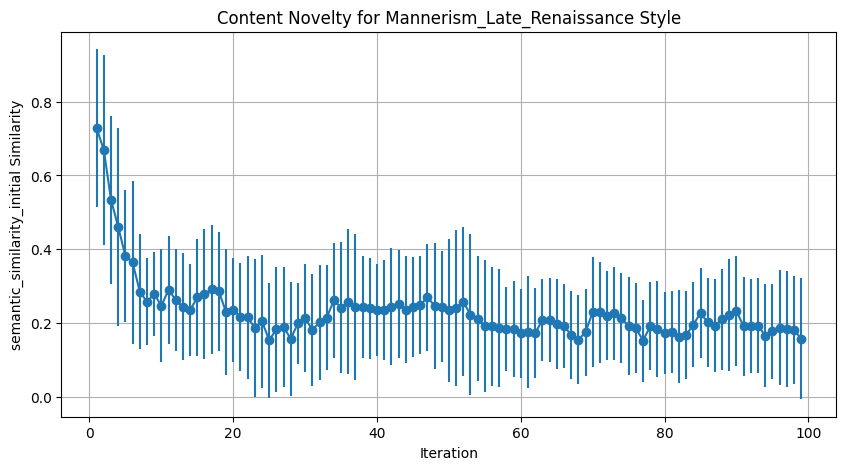

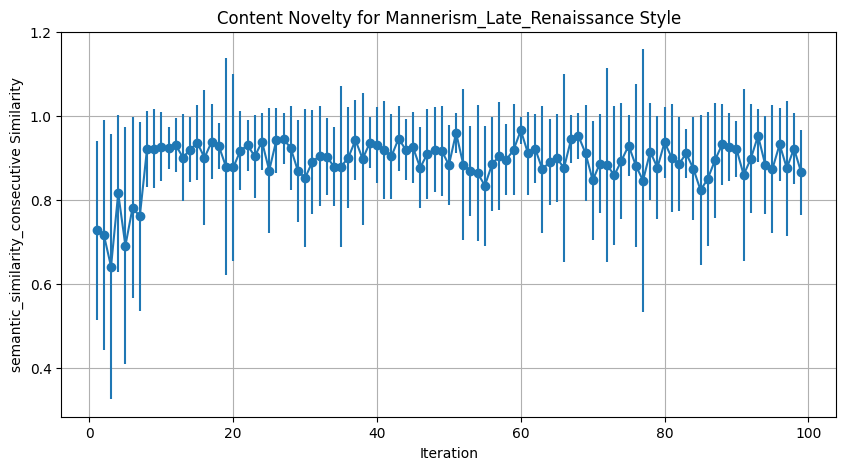

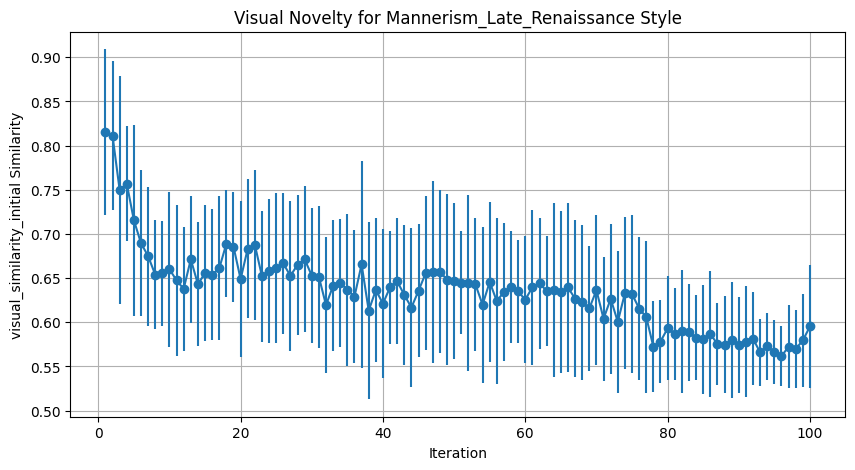

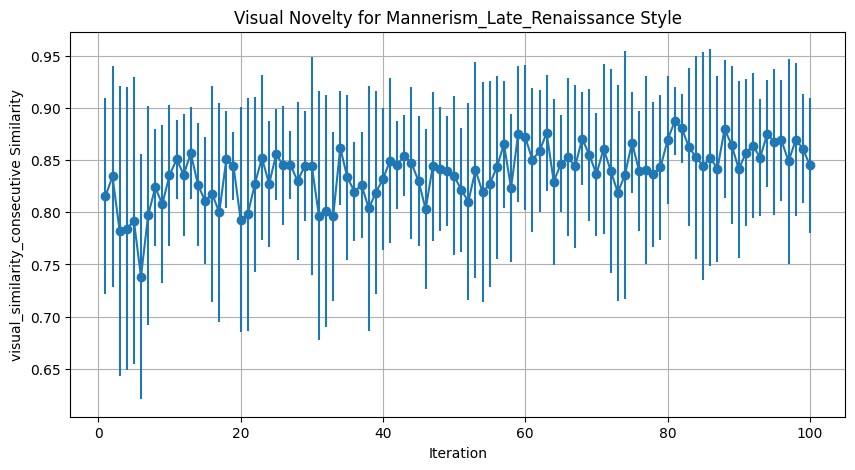

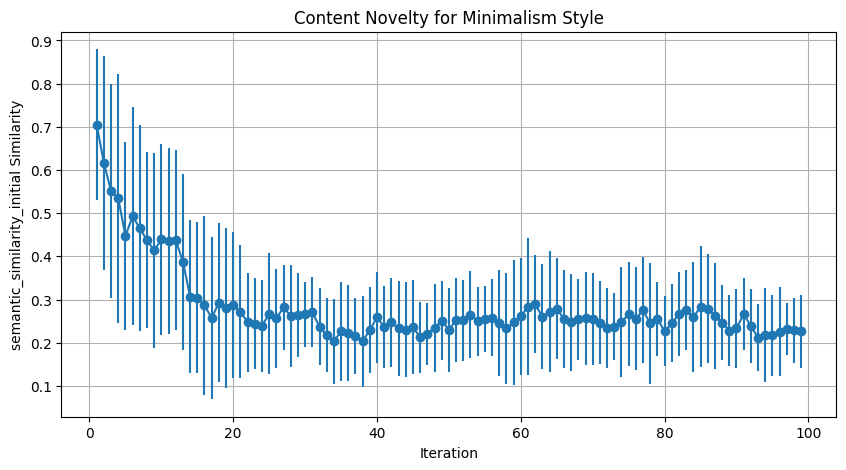

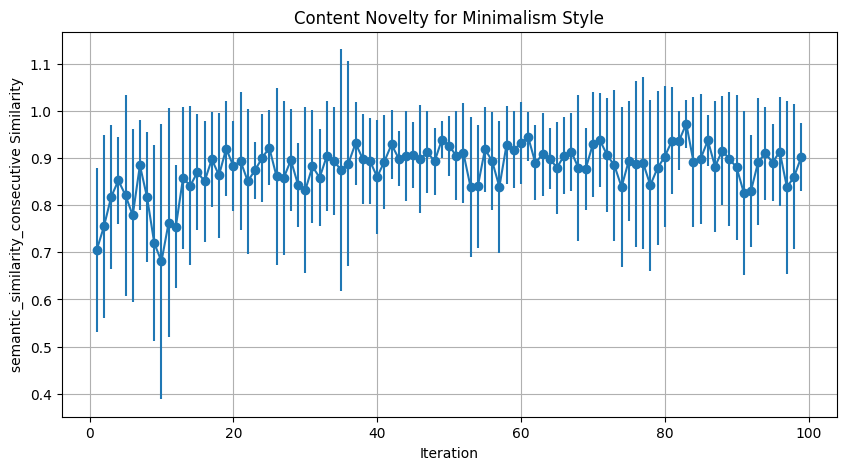

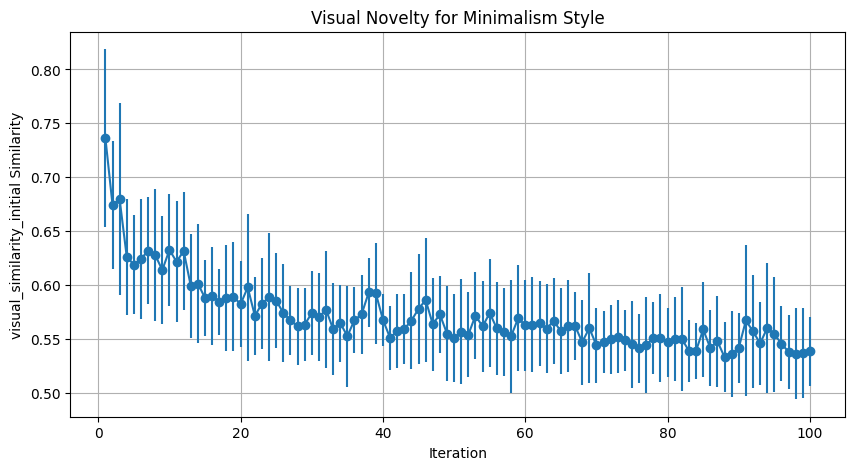

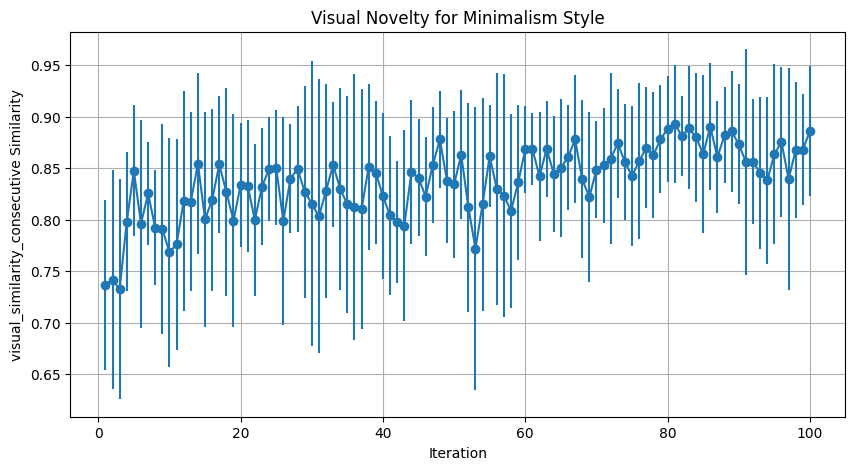

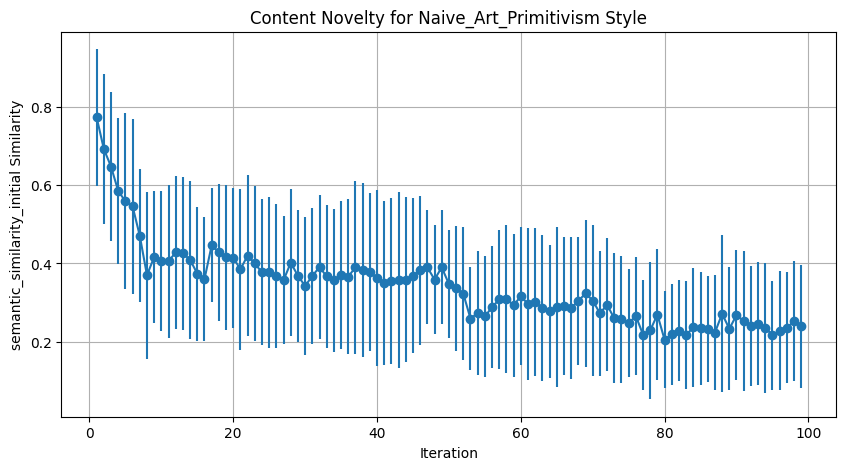

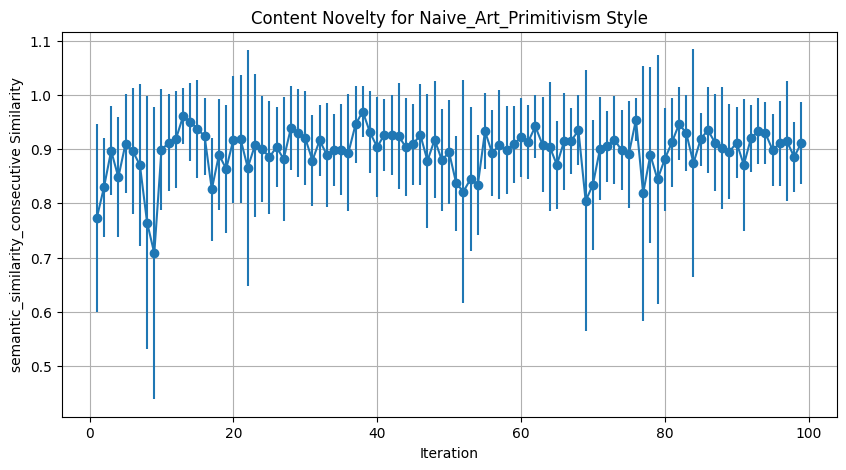

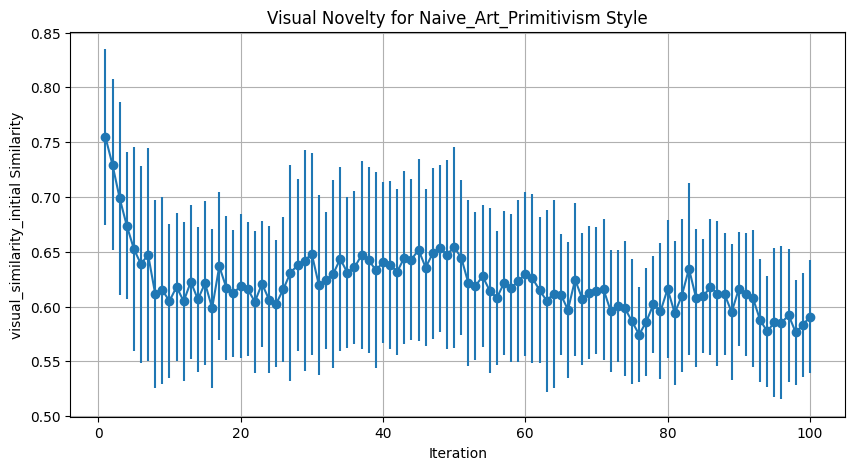

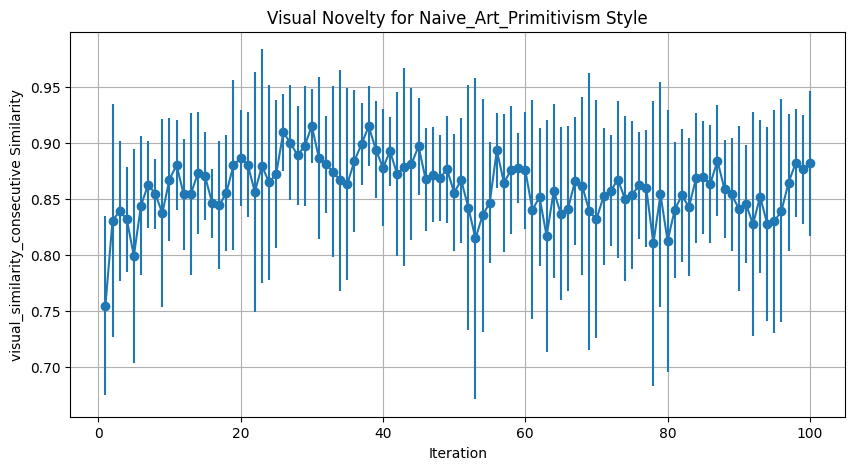

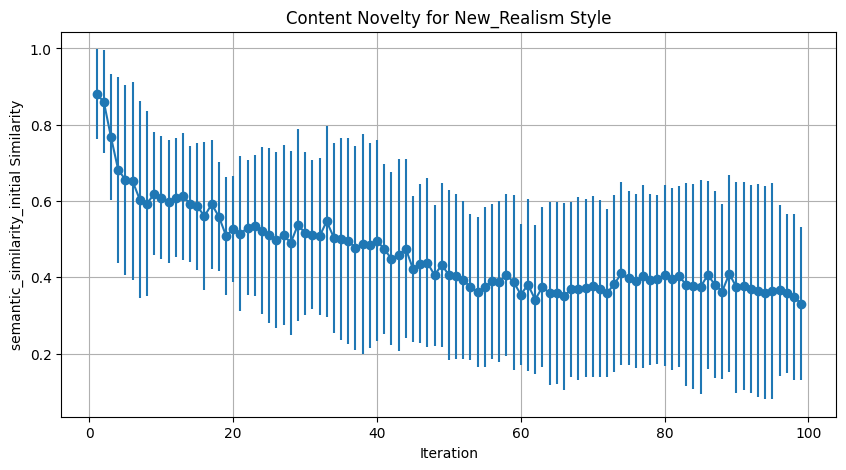

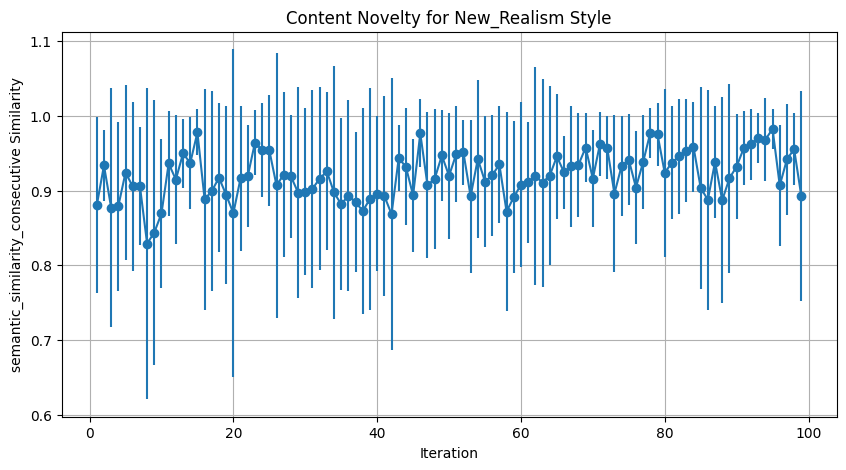

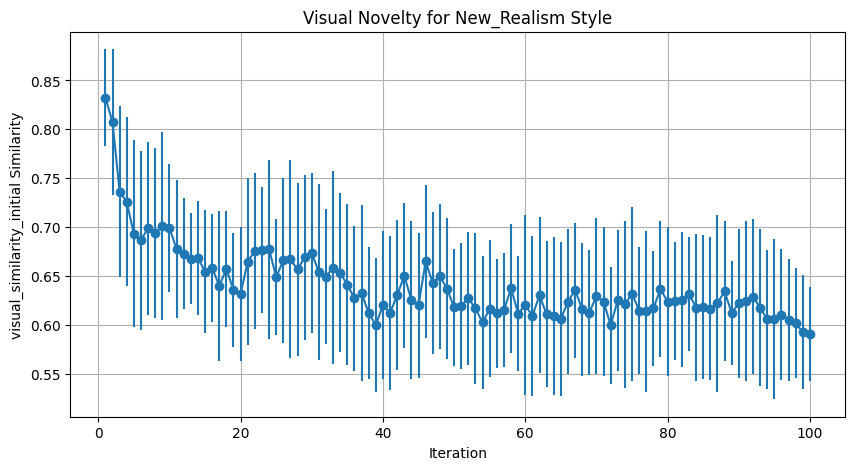

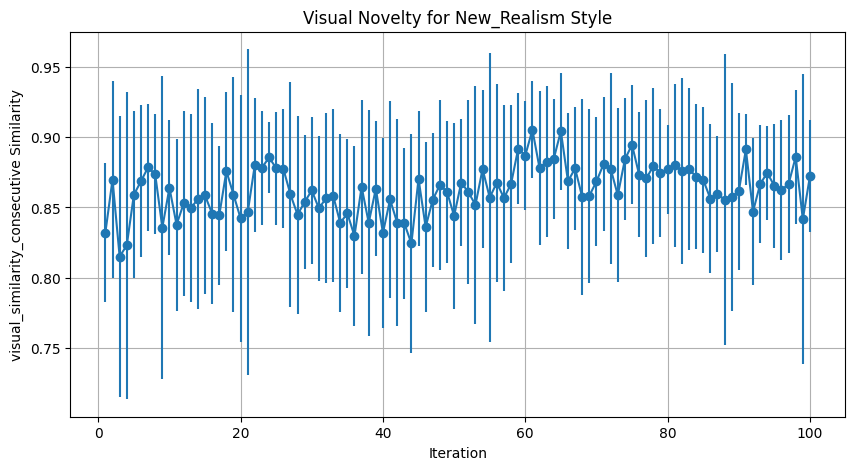

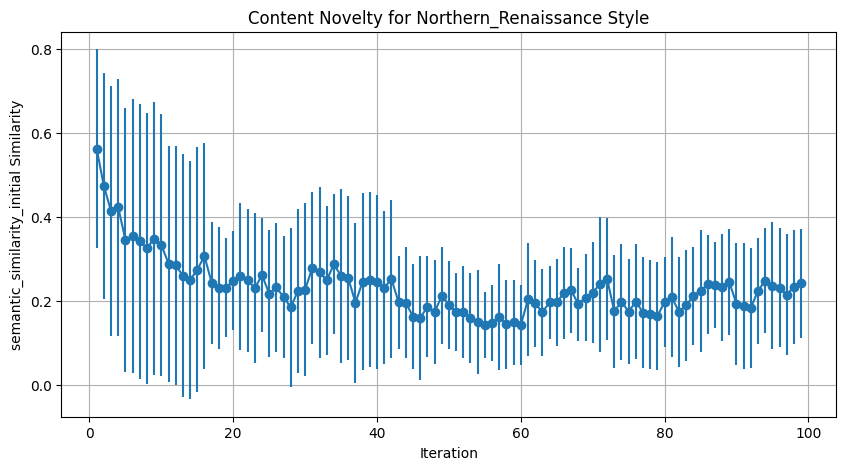

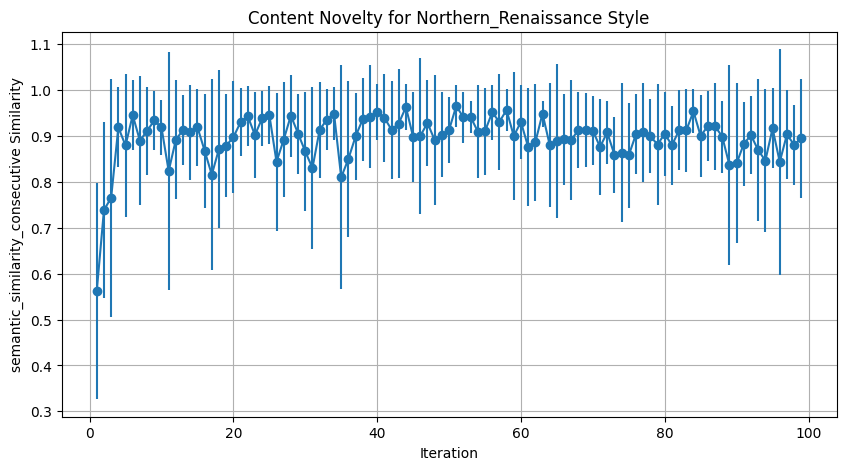

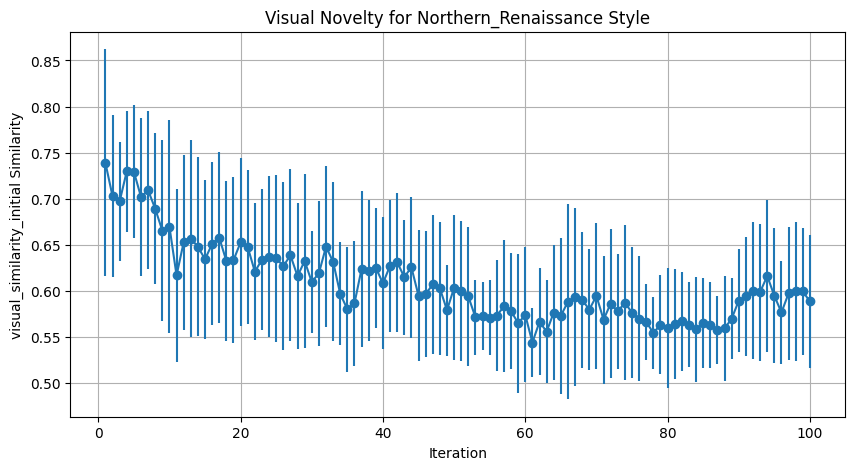

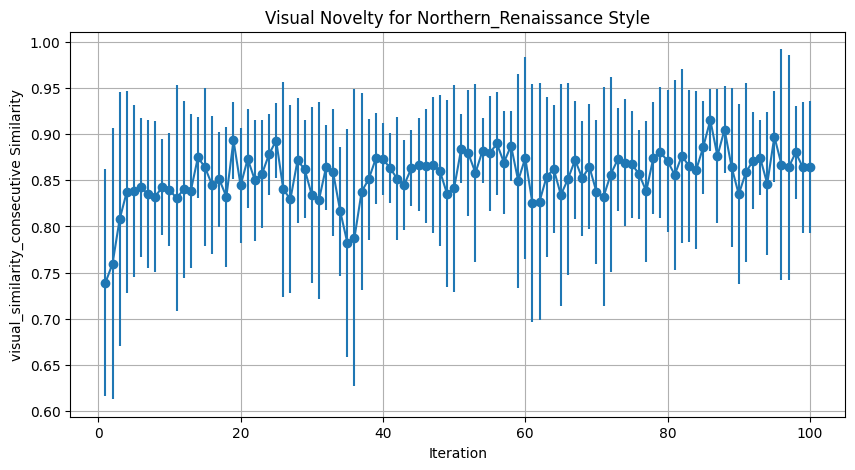

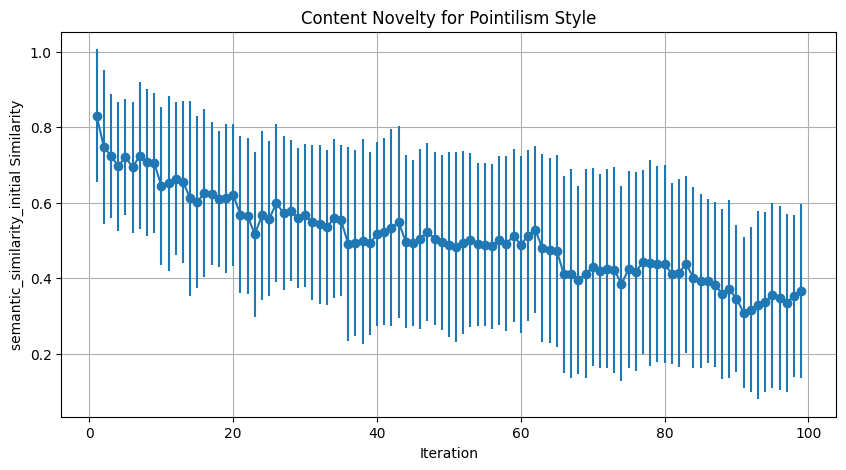

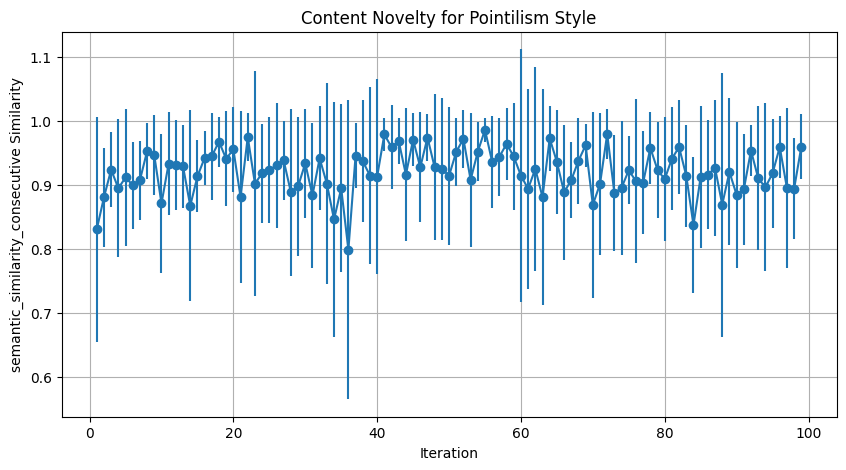

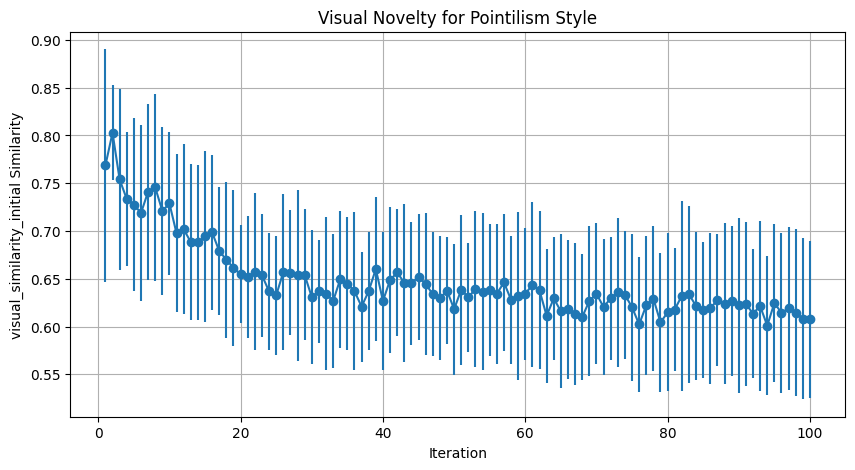

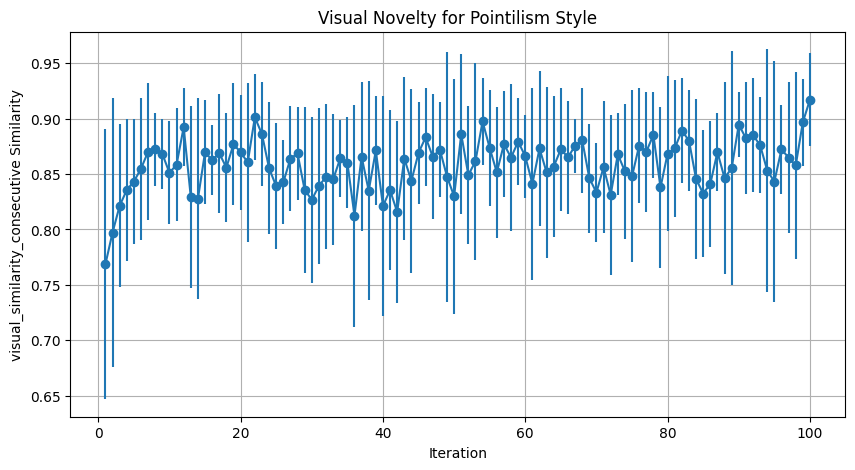

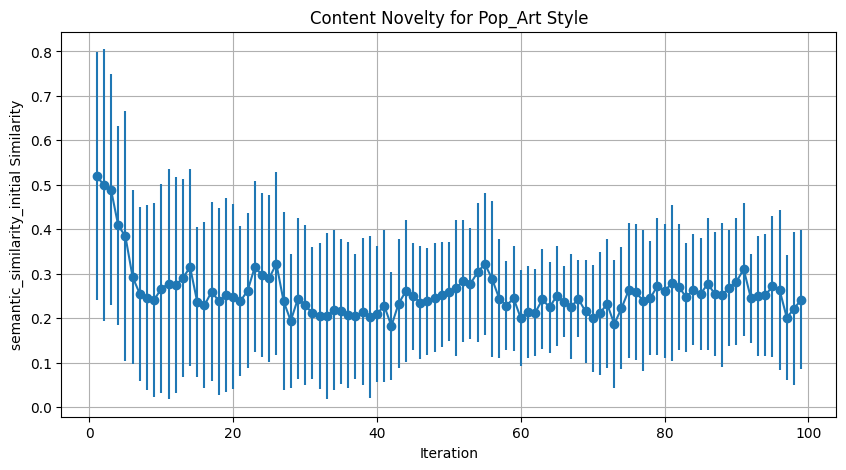

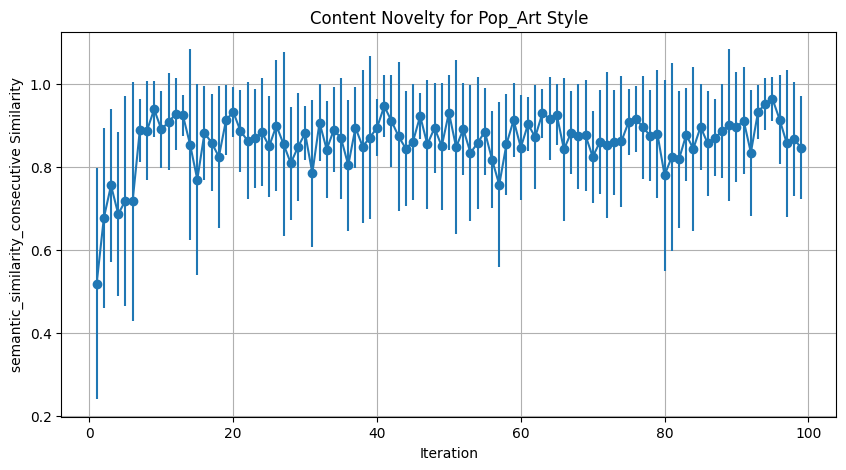

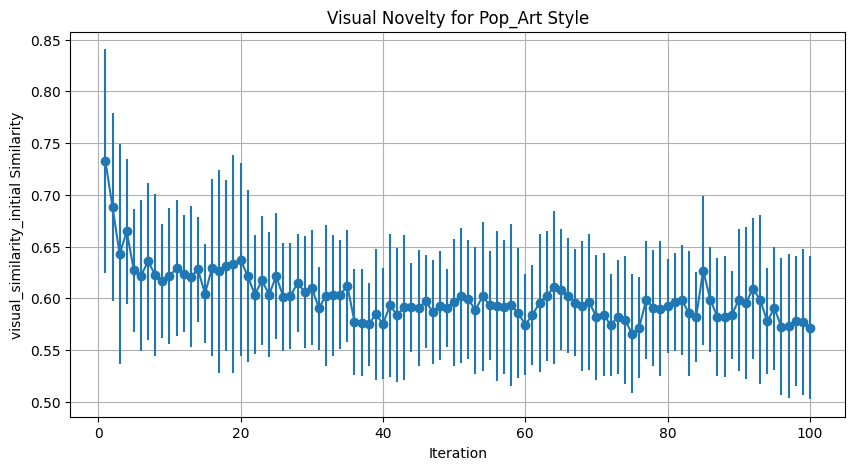

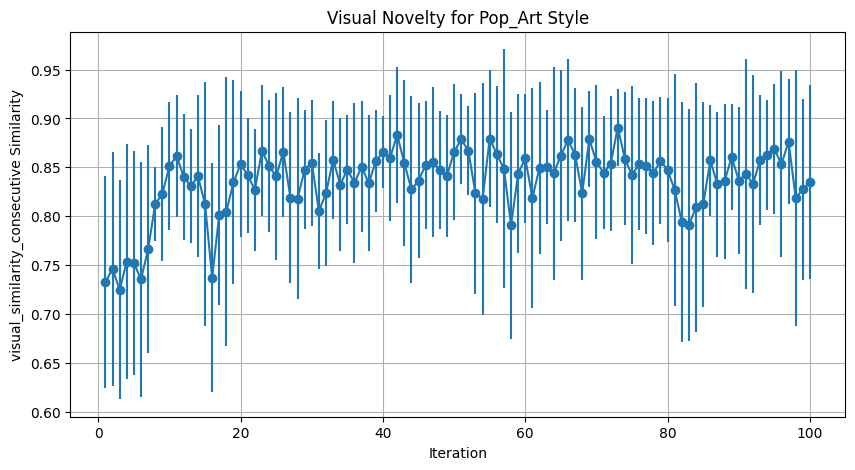

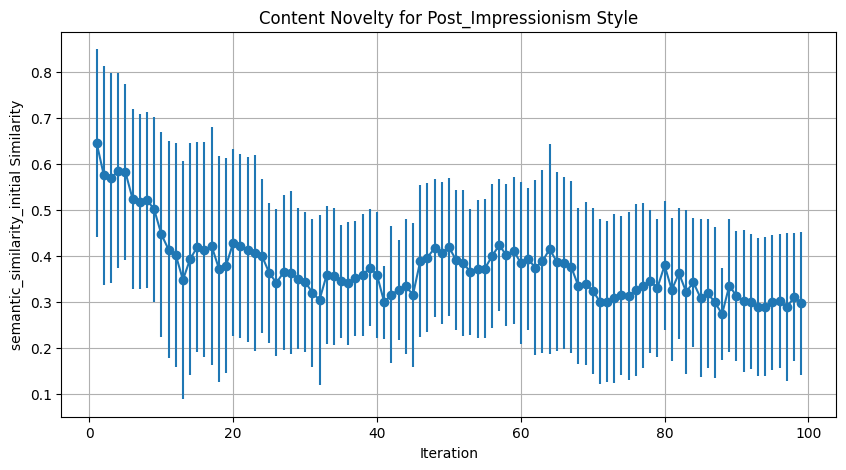

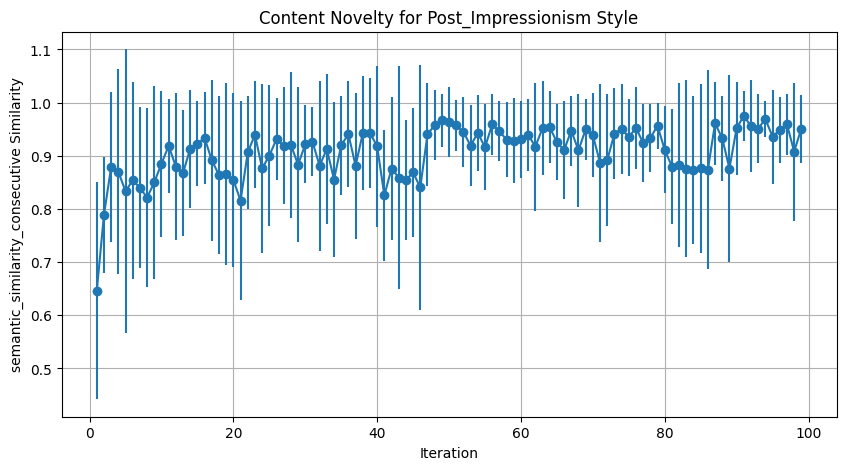

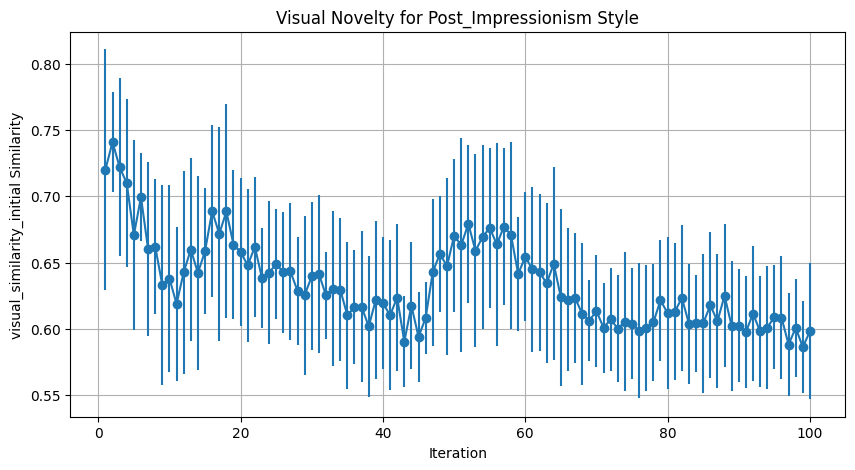

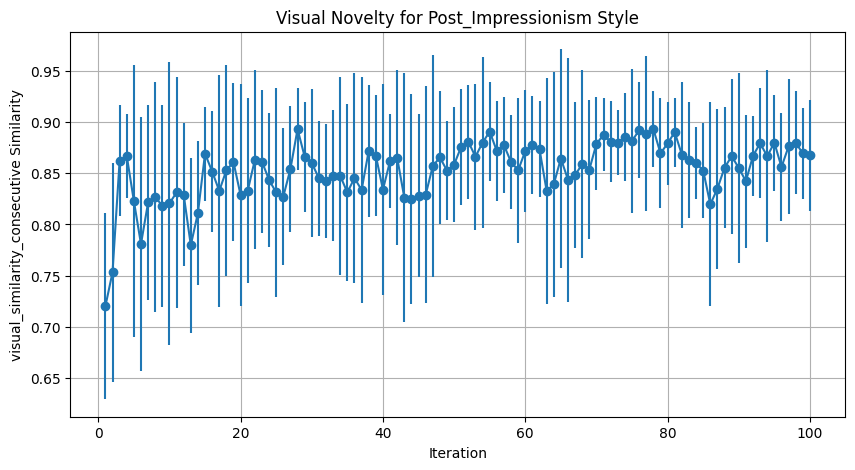

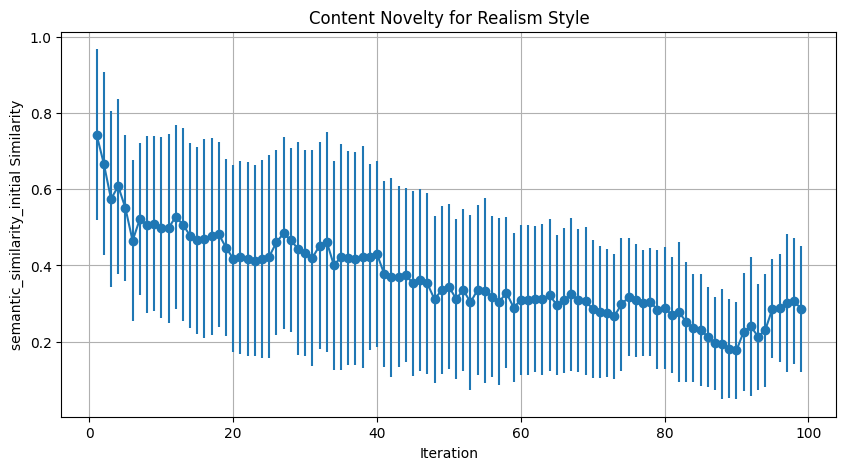

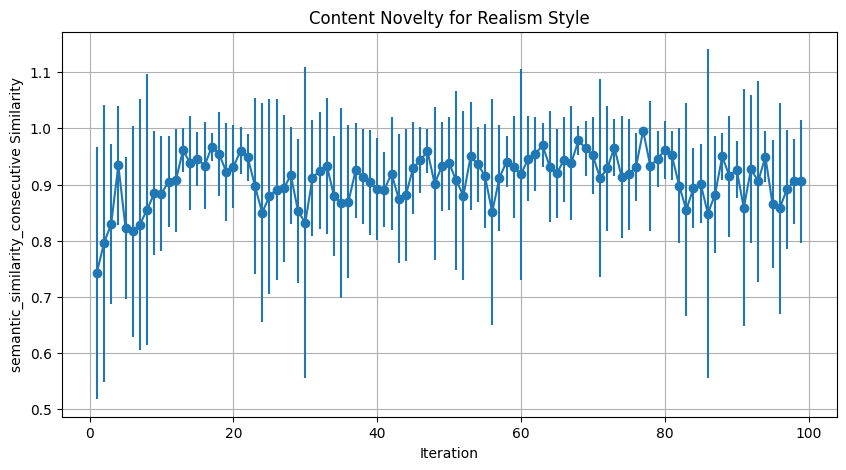

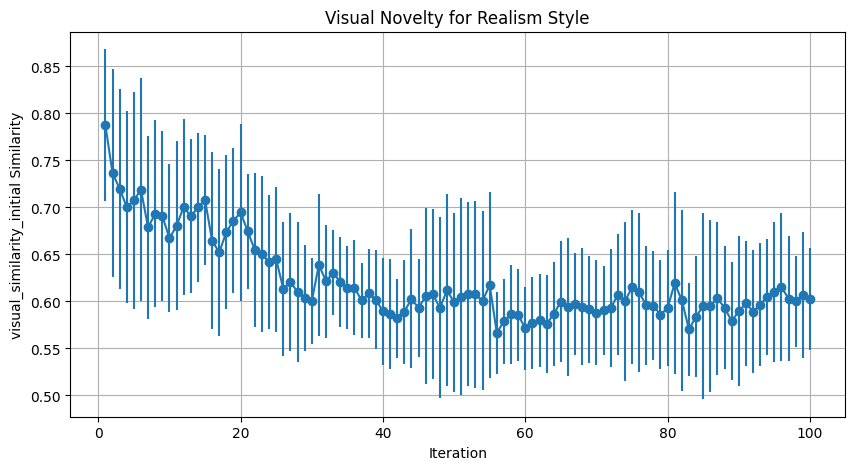

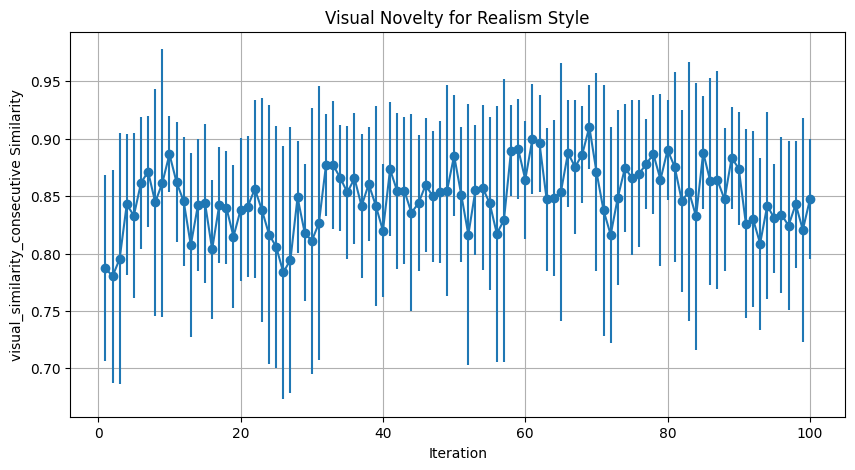

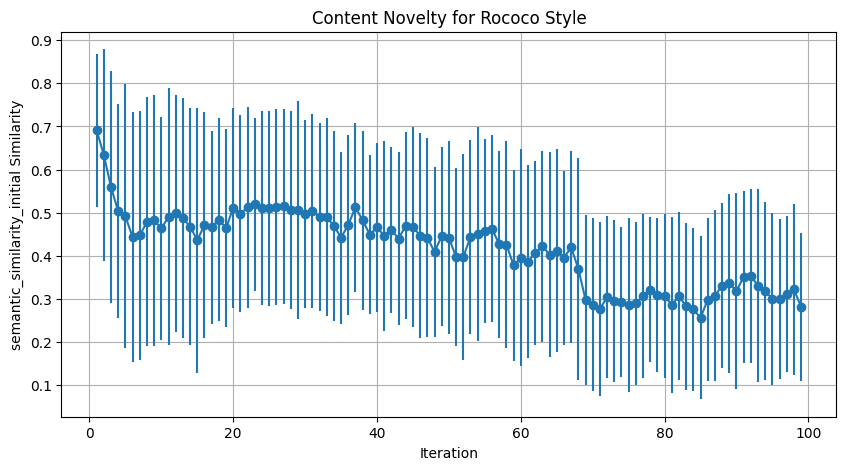

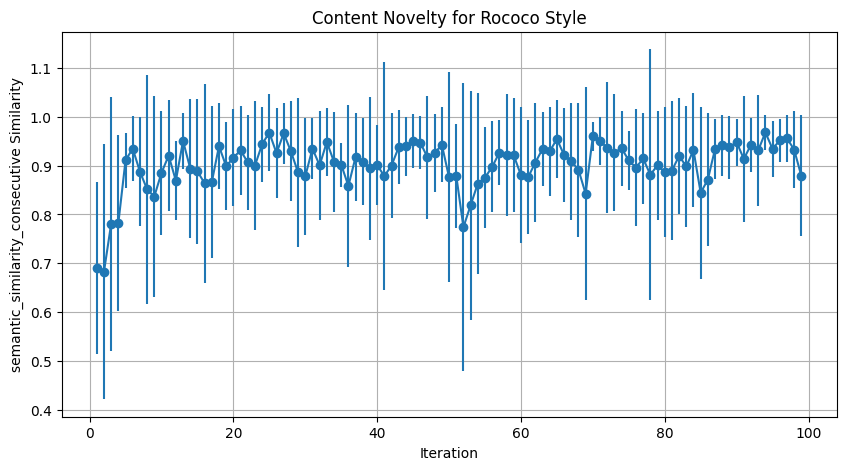

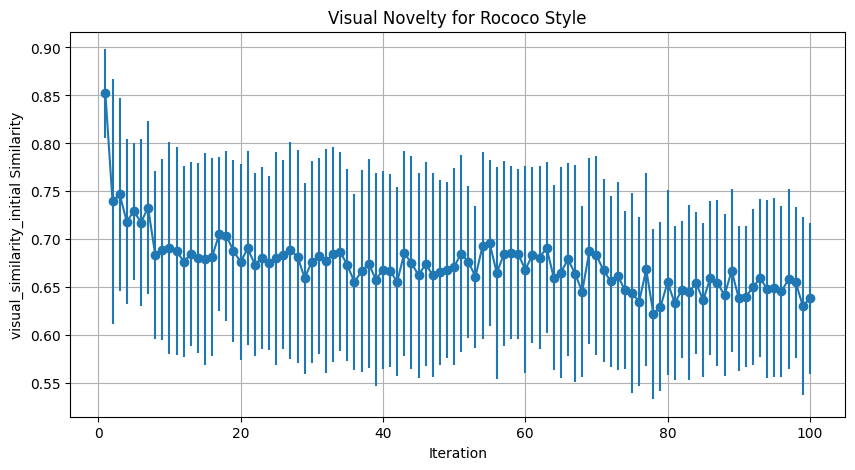

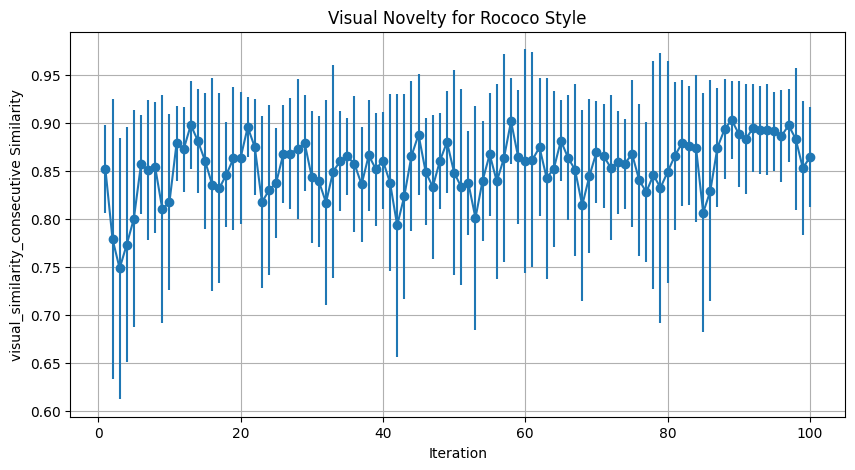

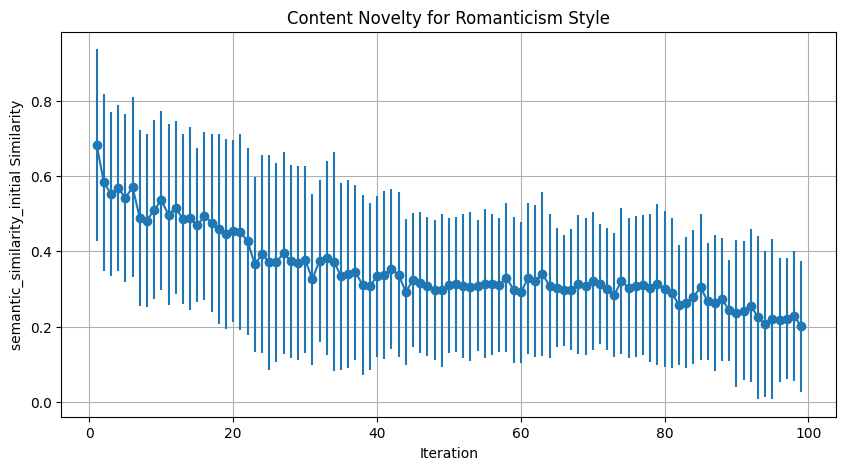

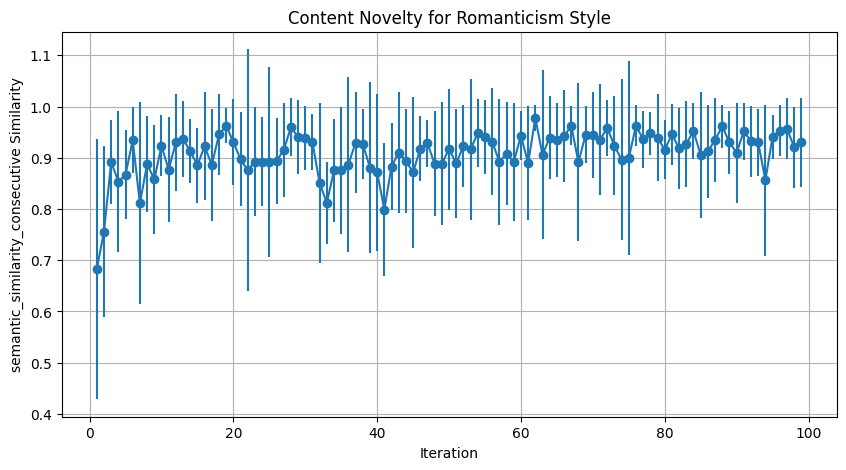

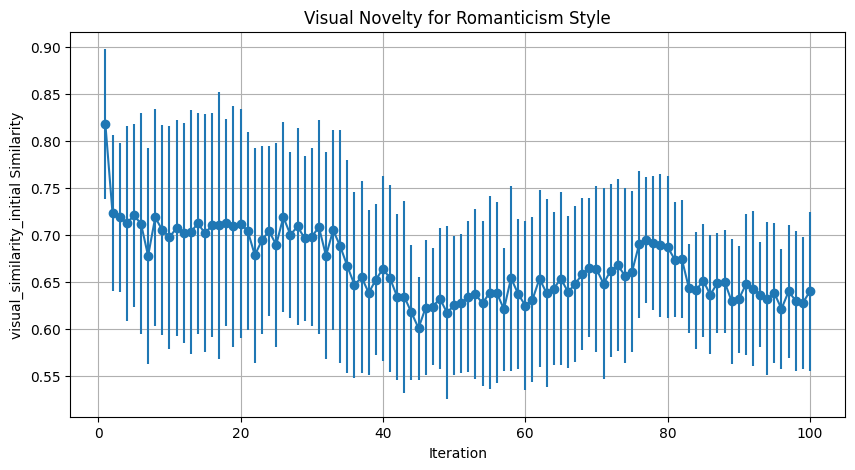

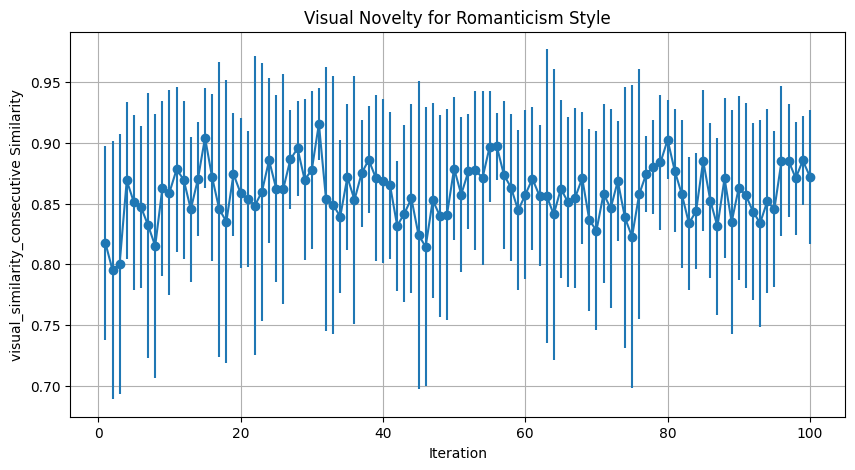

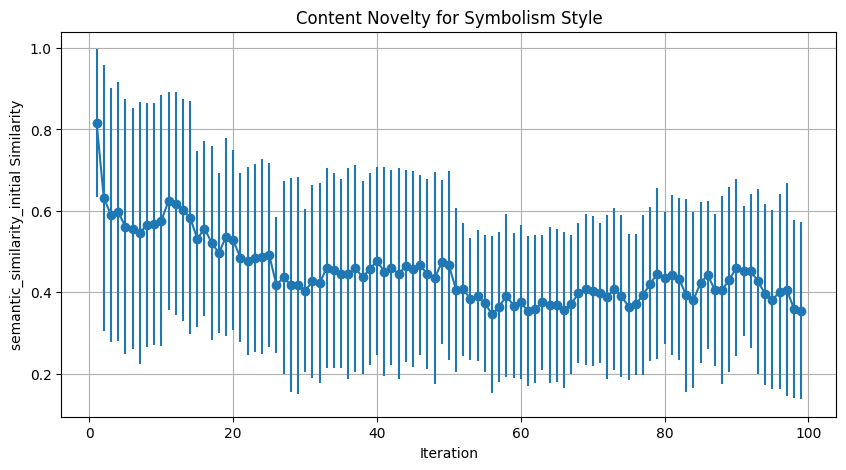

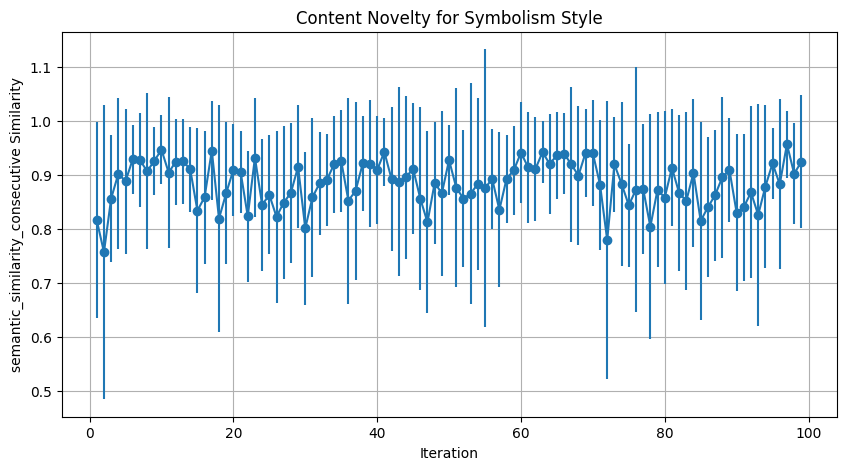

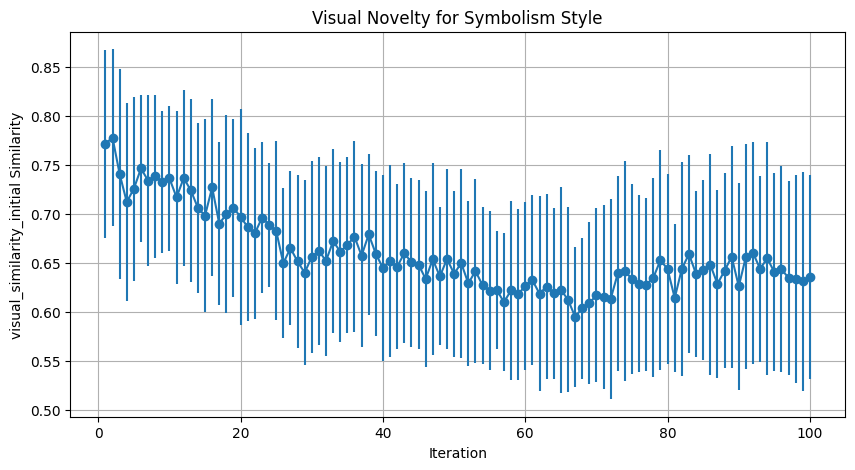

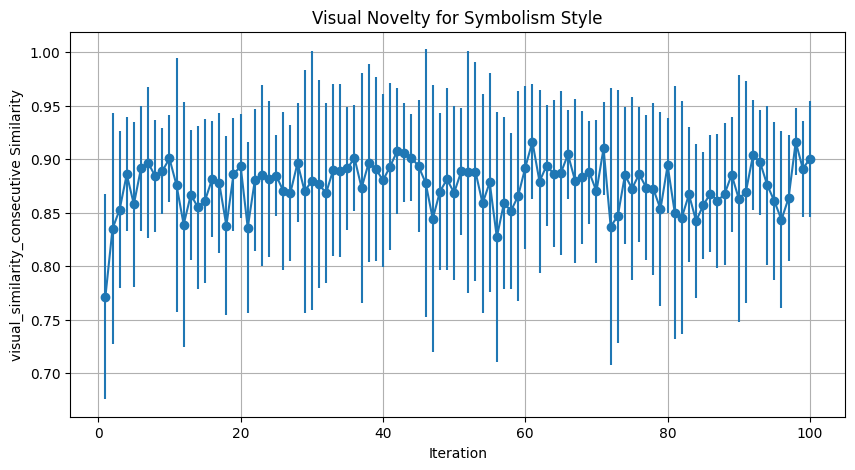

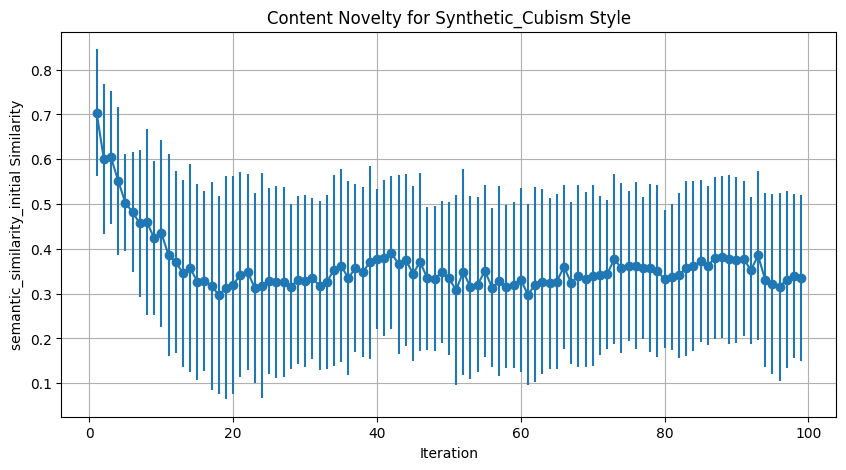

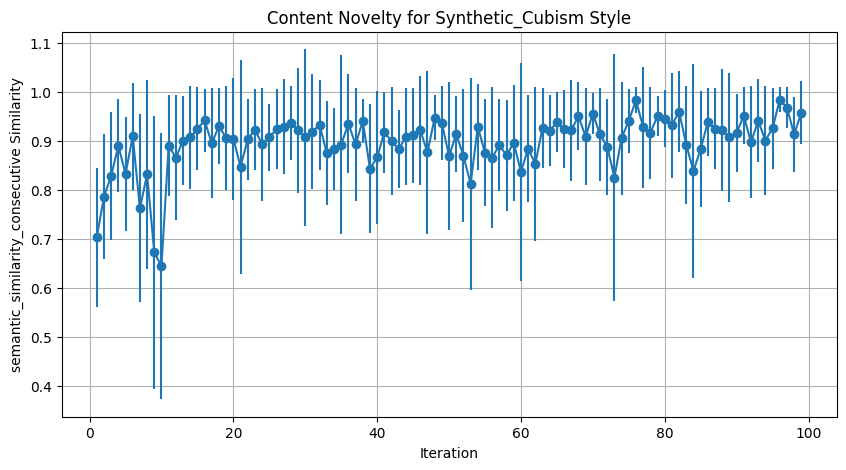

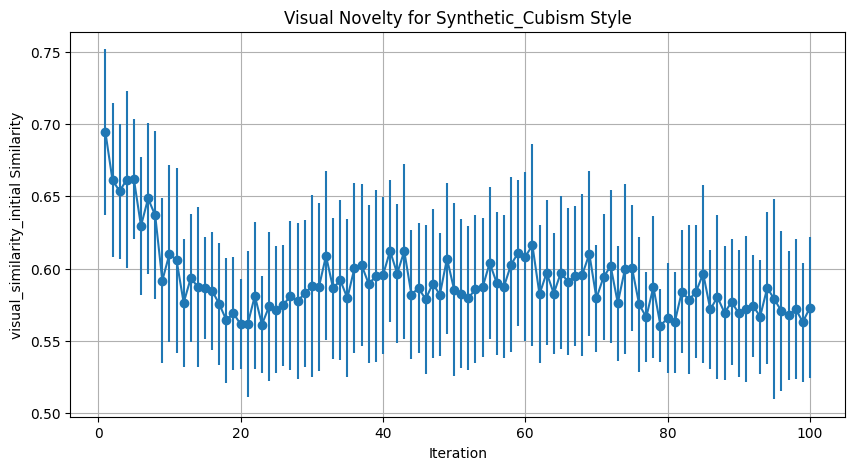

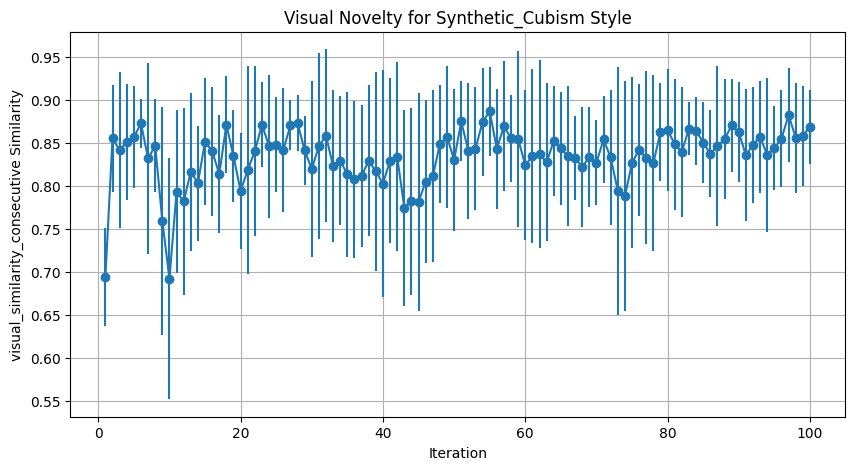

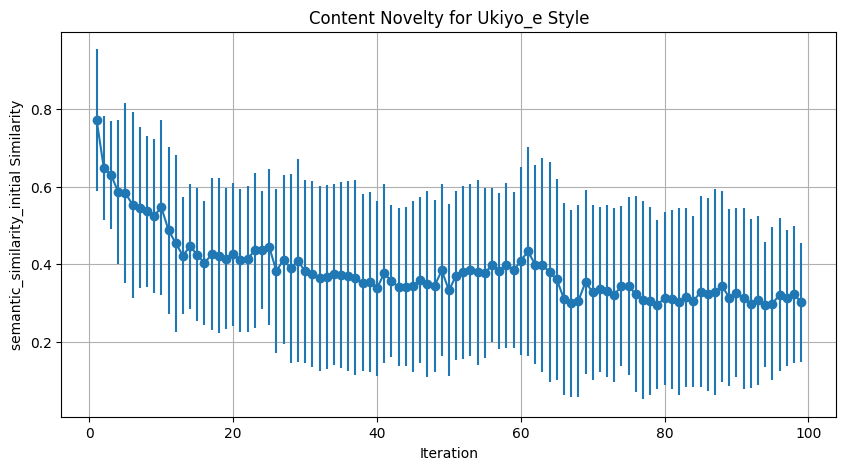

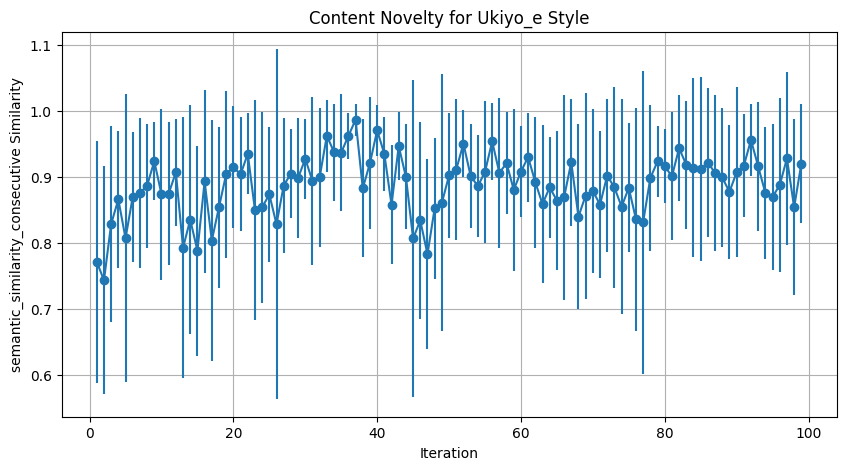

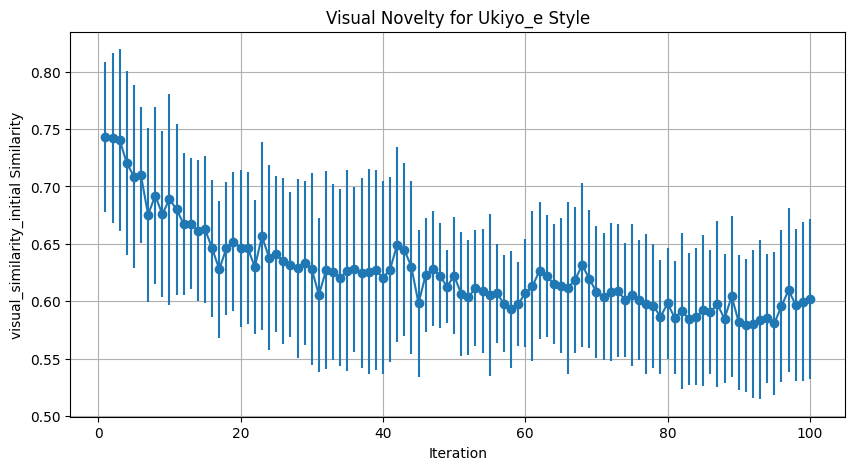

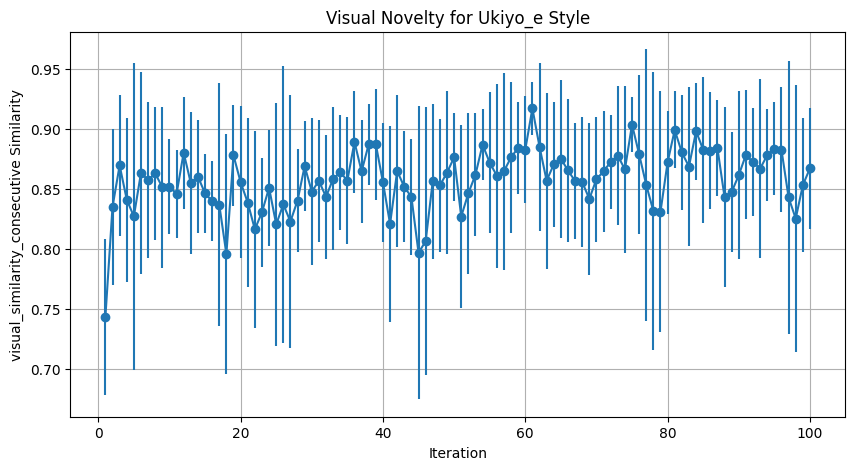

In [6]:
results_dir = 'results'
style_data = {}

for style in os.listdir(results_dir):
    style_path = os.path.join(results_dir, style)
    if os.path.isdir(style_path):
        style_data[style] = {
            'semantic_similarity_initial': [],
            'semantic_similarity_consecutive': [],
            'visual_similarity_initial': [],
            'visual_similarity_consecutive': []
        }
        for artwork in os.listdir(style_path):
            artwork_path = os.path.join(style_path, artwork)
            if os.path.isdir(artwork_path):
                for file in os.listdir(artwork_path):
                    if file.lower().endswith('.json'):
                        json_file_path = os.path.join(artwork_path, file)
                        extracted_data = extract_data_from_json(json_file_path)
                        
                        style_data[style]['semantic_similarity_initial'].append(extracted_data['semantic_similarity_initial'])
                        style_data[style]['semantic_similarity_consecutive'].append(extracted_data['semantic_similarity_consecutive'])
                        style_data[style]['visual_similarity_initial'].append(extracted_data['visual_similarity_initial'])
                        style_data[style]['visual_similarity_consecutive'].append(extracted_data['visual_similarity_consecutive'])

for style, data in style_data.items():
    for measure in ['semantic_similarity_initial', 'semantic_similarity_consecutive', 'visual_similarity_initial', 'visual_similarity_consecutive']:
        mean, std_dev = calculate_statistics(data[measure])
        plot_statistics(style, measure, mean, std_dev)

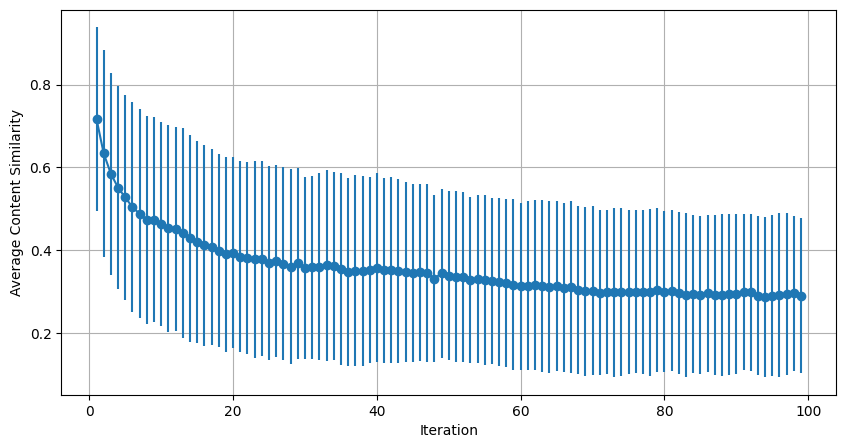

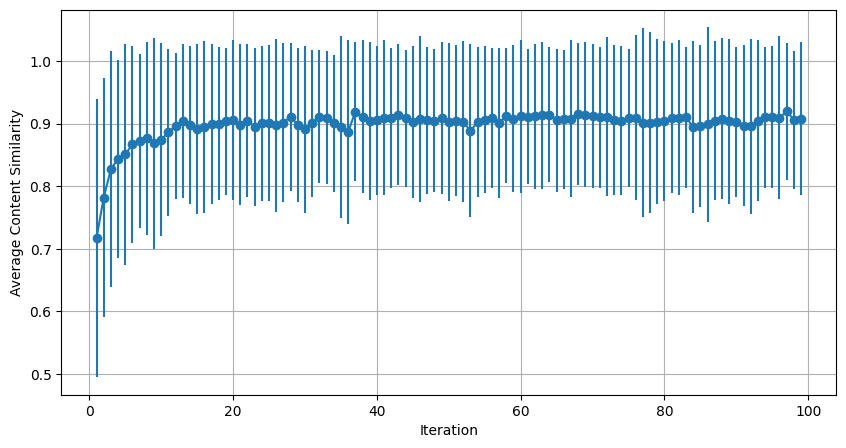

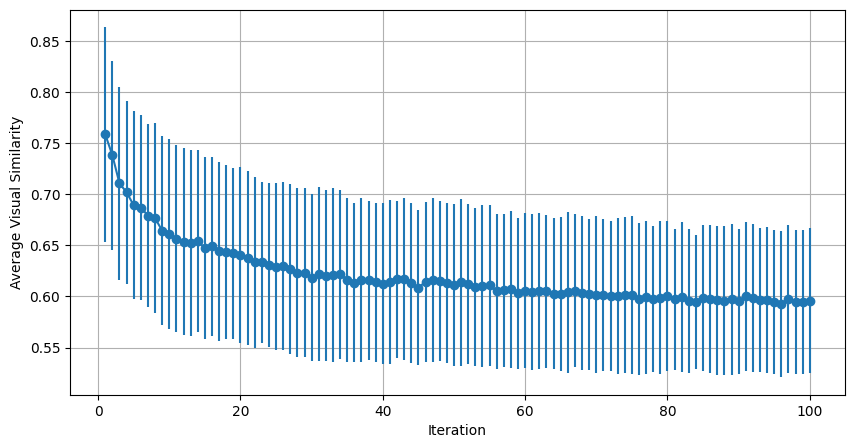

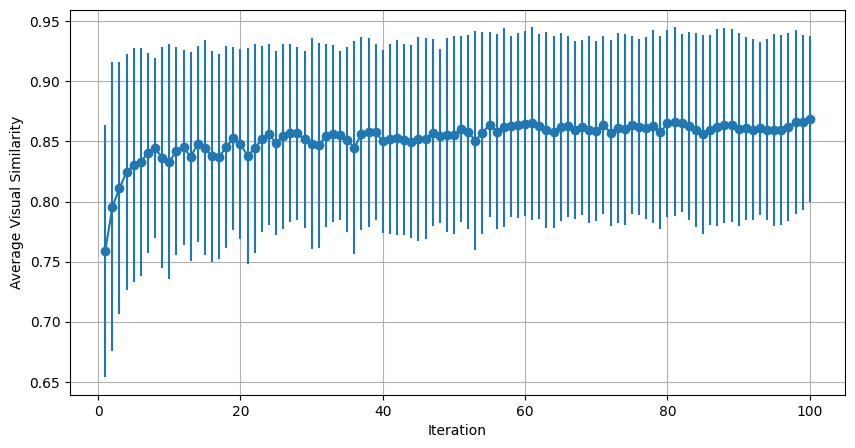

In [78]:
aggregated_data = {
    'semantic_similarity_initial': [],
    'semantic_similarity_consecutive': [],
    'visual_similarity_initial': [],
    'visual_similarity_consecutive': []
}

for style, data in style_data.items():
    aggregated_data['semantic_similarity_initial'].extend(data['semantic_similarity_initial'])
    aggregated_data['semantic_similarity_consecutive'].extend(data['semantic_similarity_consecutive'])
    aggregated_data['visual_similarity_initial'].extend(data['visual_similarity_initial'])
    aggregated_data['visual_similarity_consecutive'].extend(data['visual_similarity_consecutive'])

for measure in ['semantic_similarity_initial', 'semantic_similarity_consecutive', 'visual_similarity_initial', 'visual_similarity_consecutive']:
    mean, std_dev = calculate_statistics(aggregated_data[measure])

    plt.figure(figsize=(10, 5))
    plt.errorbar(range(1, len(mean) + 1), mean, yerr=std_dev, fmt='-o')

    plt.xlabel('Iteration')
    measure_name = 'Content'
    measure_title = 'The 1st And The Other Generated Captions'
    if measure == 'visual_similarity_initial' or measure == 'visual_similarity_consecutive':
        measure_name = 'Visual'
    if measure == 'semantic_similarity_consecutive' or measure == 'visual_similarity_consecutive':
        measure_title = 'Consecutive Generated Captions'
    title = f'{measure_name} Similarity Between {measure_title} Over Iterations'
    plt.ylabel(f'Average {measure_name} Similarity')
    plt.grid(True)
    plt.savefig(f'results/all_artworks_{measure.lower()}_similarity.png') 
    plt.show()
    plt.close()

In [79]:
import numpy as np

def convergence_point(similarity_list, epsilon):
    convergence_point = 0
    min = np.min(similarity_list)
    for t in range(0, len(similarity_list)):
        delta = abs(similarity_list[t] - min)
        if delta > epsilon:
            convergence_point = t
    return convergence_point, min

epsilon_1 = 0.02  # Convergence threshold for content similarity
epsilon_2 = 0.01  # Convergence threshold for visual similarity

# Aggregated data for content and visual similarities
content_similarity, sd1 = calculate_statistics(aggregated_data['semantic_similarity_initial'])
visual_similarity, sd2 = calculate_statistics(aggregated_data['visual_similarity_initial'])

content_convergence, content_min = convergence_point(content_similarity, epsilon_1)
visual_convergence, visual_min = convergence_point(visual_similarity, epsilon_2)

print(f"Content Convergence: {content_convergence}, {content_min}")
print(f"Visual Convergence: {visual_convergence}, {visual_min}")

Content Convergence: 66, 0.2858434749094562
Visual Convergence: 67, 0.5926686614294778


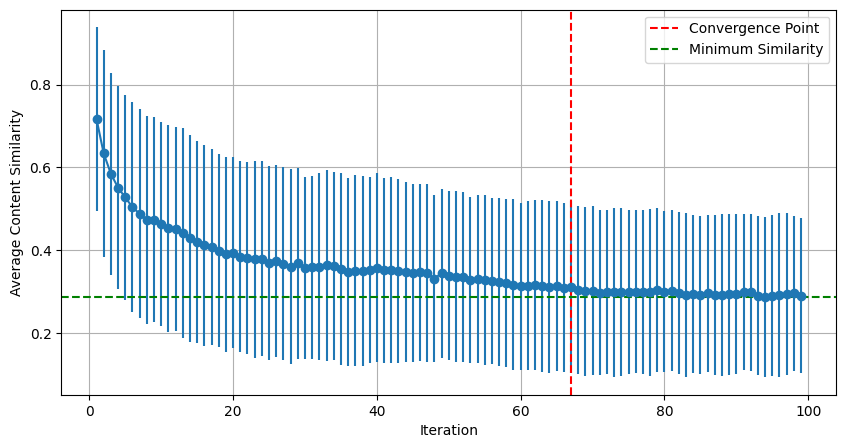

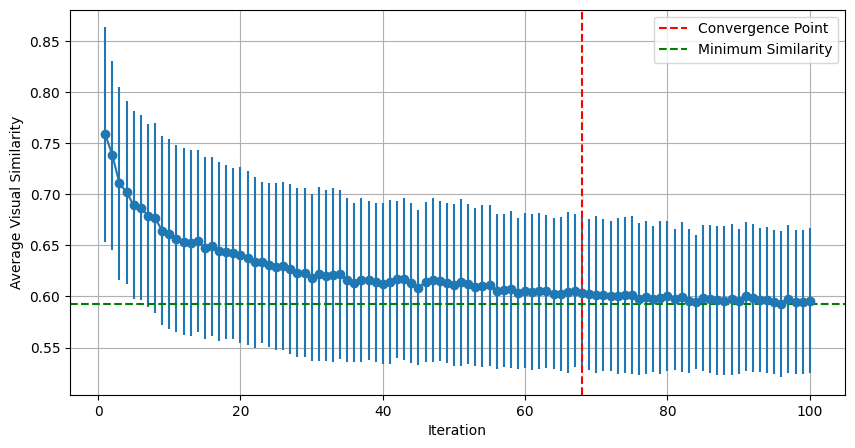

In [81]:
for measure in ['semantic_similarity_initial', 'visual_similarity_initial']:
    mean, ci = calculate_statistics_2(aggregated_data[measure])
    mean, std_dev = calculate_statistics(aggregated_data[measure])
    plt.figure(figsize=(10, 5))
    plt.errorbar(range(1, len(mean) + 1), mean, yerr=ci, fmt='-o', capsize=3, color='purple')
    plt.errorbar(range(1, len(mean) + 1), mean, yerr=std_dev, fmt='-o')
    plt.xlabel('Iteration')
    
    measure_name = 'Content'
    measure_title = 'The 1st And The Other Generated Captions'
    if measure == 'visual_similarity_initial' or measure == 'visual_similarity_consecutive':
        measure_name = 'Visual'
    if measure == 'semantic_similarity_consecutive' or measure == 'visual_similarity_consecutive':
        measure_title = 'Consecutive Generated Captions'
    title = f'{measure_name} Similarity Between {measure_title} Over Iterations'
    
    plt.ylabel(f'Average {measure_name} Similarity')
    plt.grid(True)

    if measure == 'semantic_similarity_initial':
        convergence, min_val = content_convergence, content_min
    elif measure == 'visual_similarity_initial':
        convergence, min_val = visual_convergence, visual_min
    
    plt.axvline(x=convergence + 1, color='r', linestyle='--', label='Convergence Point')
    plt.axhline(y=min_val, color='g', linestyle='--', label='Minimum Similarity')

    plt.legend()

    plt.savefig(f'results/all_artworks_{measure.lower()}_similarity_convergence.png')
    plt.show()
    plt.close()

In [ ]:
for measure in ['semantic_similarity_initial', 'visual_similarity_initial']:
    mean, std_dev = calculate_statistics(aggregated_data[measure])
    mean, ci = calculate_statistics_2(aggregated_data[measure])
    plt.figure(figsize=(10, 5))
    plt.errorbar(range(1, len(mean) + 1), mean, yerr=ci, fmt='-o', capsize=3, color='purple')
    plt.errorbar(range(1, len(mean) + 1), mean, yerr=std_dev, fmt='-o')
    plt.xlabel('Iteration')
    
    measure_name = 'Content'
    measure_title = 'The 1st And The Other Generated Captions'
    if measure == 'visual_similarity_initial' or measure == 'visual_similarity_consecutive':
        measure_name = 'Visual'
    if measure == 'semantic_similarity_consecutive' or measure == 'visual_similarity_consecutive':
        measure_title = 'Consecutive Generated Captions'
    title = f'{measure_name} Similarity Between {measure_title} Over Iterations'
    
    plt.ylabel(f'Average {measure_name} Similarity')
    plt.grid(True)

    if measure == 'semantic_similarity_initial':
        convergence, min_val = content_convergence, content_min
    elif measure == 'visual_similarity_initial':
        convergence, min_val = visual_convergence, visual_min
    
    plt.axvline(x=convergence + 1, color='r', linestyle='--', label='Convergence Point')
    plt.axhline(y=min_val, color='g', linestyle='--', label='Minimum Similarity')

    plt.legend()

    plt.savefig(f'results/all_artworks_{measure.lower()}_similarity_convergence_ci.png')  
    plt.show()
    plt.close()

In [10]:
import shutil

results_dir = 'results'
iterations_dir = 'iterations'

if not os.path.exists(iterations_dir):
    os.makedirs(iterations_dir)

for i in range(101):
    iteration_folder = os.path.join(iterations_dir, f'iteration{i}')
    if not os.path.exists(iteration_folder):
        os.makedirs(iteration_folder)

for style in os.listdir(results_dir):
    style_path = os.path.join(results_dir, style)
    if os.path.isdir(style_path):
        for artwork in os.listdir(style_path):
            artwork_path = os.path.join(style_path, artwork)
            if os.path.isdir(artwork_path):
                for file in os.listdir(artwork_path):
                    if file.lower().endswith('.png'):
                        file_name, file_ext = os.path.splitext(file)
                        if file_name.startswith('image'):
                            try:
                                iteration_num = int(file_name[6:])  # Get the number after 'image_'
                                if 0 <= iteration_num <= 100:
                                    target_dir = os.path.join(iterations_dir, f'iteration{iteration_num}')
                                    source_file = os.path.join(artwork_path, file)
                                    new_file_name = f"{artwork}_{iteration_num}{file_ext}"
                                    destination_file = os.path.join(target_dir, new_file_name)
                                    shutil.copy(source_file, destination_file)
                            except ValueError:
                                pass

In [82]:
import os
from PIL import Image
import torch
from torchvision import transforms
import pytorch_fid_wrapper as pfw
import matplotlib.pyplot as plt

batch_size = 50
dims = 2048
device = 'cuda' if torch.cuda.is_available() else 'cpu'

pfw.set_config(batch_size=batch_size, dims=dims, device=device)

base_dir = 'iterations'
real_images_dir = os.path.join(base_dir, 'iteration0')

def load_images_from_folder(folder):
    transform = transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
    ])
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('RGB')
            img_tensor = transform(img)
            images.append(img_tensor)
    return torch.stack(images) if images else None

real_images = load_images_from_folder(real_images_dir)

fid_scores = []
for i in range(1, 101):
    fake_images_dir = os.path.join(base_dir, f'iteration{i}')
    fake_images = load_images_from_folder(fake_images_dir)
    if fake_images is not None:
        fid_score = pfw.fid(fake_images, real_images=real_images)
        fid_scores.append(fid_score)
        print(f"FID score for {fake_images_dir}: {fid_score}")
    else:
        print(f"No images found in {fake_images_dir}, skipping.")

c:\Users\1782a\OneDrive - Delft University of Technology\year 3\Research Project\code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\1782a\OneDrive - Delft University of Technology\year 3\Research Project\code\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\1782a\OneDrive - Delft University of Technology\year 3\Research Project\code\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


FID score for iterations\iteration1: 184.14084609100803
FID score for iterations\iteration2: 165.45446533477798
FID score for iterations\iteration3: 177.19885399594756
FID score for iterations\iteration4: 173.77492830822428
FID score for iterations\iteration5: 179.74405689521808
FID score for iterations\iteration6: 179.47788588841678
FID score for iterations\iteration7: 182.28409185693295
FID score for iterations\iteration8: 179.92203012387137
FID score for iterations\iteration9: 189.606494179052
FID score for iterations\iteration10: 188.10211071557376
FID score for iterations\iteration11: 189.07712154375184
FID score for iterations\iteration12: 188.85609075362896
FID score for iterations\iteration13: 191.56879291087586
FID score for iterations\iteration14: 190.30308684020184
FID score for iterations\iteration15: 191.1176980486817
FID score for iterations\iteration16: 194.23895325363208
FID score for iterations\iteration17: 194.14970422824928
FID score for iterations\iteration18: 191.4

[184.14084609100803, 165.45446533477798, 177.19885399594756, 173.77492830822428, 179.74405689521808, 179.47788588841678, 182.28409185693295, 179.92203012387137, 189.606494179052, 188.10211071557376, 189.07712154375184, 188.85609075362896, 191.56879291087586, 190.30308684020184, 191.1176980486817, 194.23895325363208, 194.14970422824928, 191.49218835334938, 190.4512681119736, 195.28352270921312, 196.3966815526573, 195.46767910045799, 196.0900103045022, 194.777655167943, 193.35363152180054, 196.45840476865095, 196.45718270738809, 197.84609154363847, 198.2312586483195, 196.7065197415356, 196.27549695626607, 196.68187918358888, 193.83046187194134, 194.67392499760916, 197.18212772712303, 201.49816598967436, 198.60071817528063, 198.51018033689377, 201.45575669605432, 202.78940862763, 199.64547741976065, 197.1131978728116, 194.83046433185962, 201.72971109687893, 203.4229415493886, 202.8471343120209, 196.51087830671145, 198.63188828529468, 196.39495483124904, 201.803826805551, 194.7957982371161

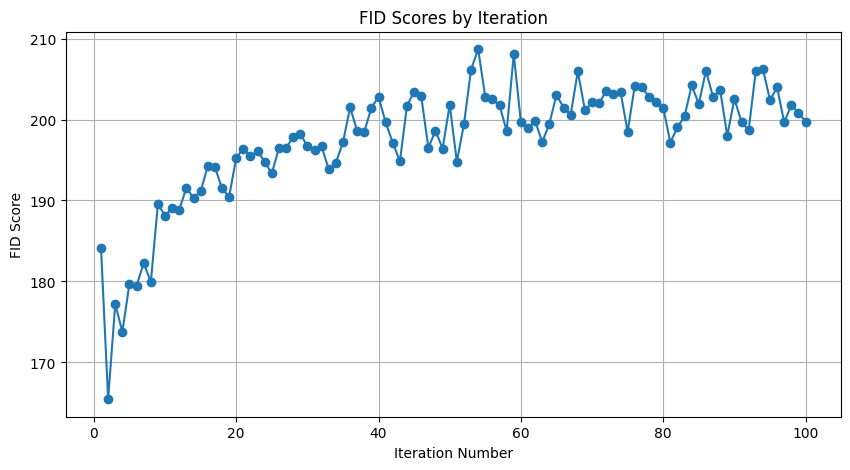

In [83]:
print(fid_scores)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(fid_scores)+1), fid_scores, marker='o')
plt.title('FID Scores by Iteration')
plt.xlabel('Iteration Number')
plt.ylabel('FID Score')
plt.grid(True)
plt.savefig("FID Scores")
plt.show()